# Deep Learning 

# 0. Pre

## Introduction
The purpose of this notebook is to teach you some essentials about the Pytorch library. We will also implement our own dataloader, model, and trainer, so that after we train the model, it can distinguish between different cloths! The good news is, if you do this notebook carefully and appropriately, you will have a nice snippet-base to use later on. So let's start `shift+Enter`ing :)

## Requirements

In [ ]:
!pip install -q numpy torch torchvision pillow tqdm

## Imports

In [ ]:
from copy import deepcopy
from math import ceil

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score
from torchvision.datasets import FashionMNIST
from tqdm.notebook import tqdm

# 1. Data

## Dataset and Dataloader

### Dataset
We will use Fashion-MNIST dataset for our experiments in this notebook. It is a small dataset, so you will not need a GPU for your training.

In [ ]:
# Making datasets
train_set = FashionMNIST(root='fashion-mnist', download=True, train=True)
test_set = FashionMNIST(root='fashion-mnist', download=True, train=False)

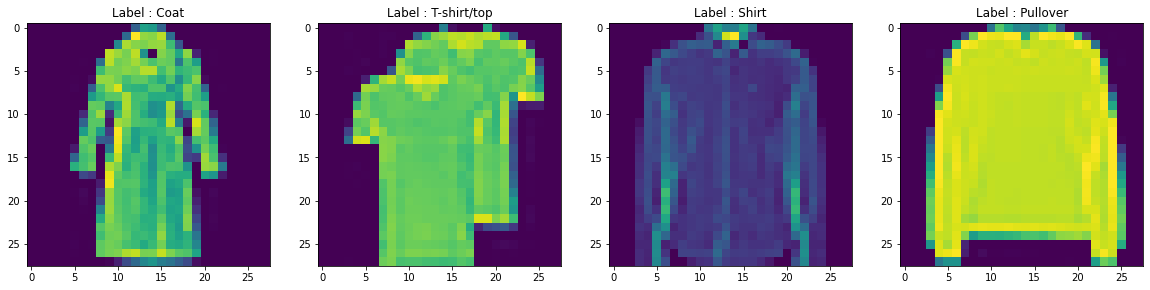

In [ ]:
# Testing samples
######################   TODO 1.1   #########################
# Write a function to plot 4 random images from the 
# training set with their respective labels

import matplotlib.pyplot as plt

classes_names = ['T-shirt/top'
, 'Trouser'
, 'Pullover'
, 'Dress'
, 'Coat'
, 'Sandal'
, 'Shirt'
, 'Sneaker'
, 'Bag'
, 'Ankle boot']

def plot_rand_imgs(ds):
  rand_idx = np.random.randint(0, len(ds), 4)
  fig, ax = plt.subplots(1, 4, figsize = (20, 20))
  for i in range(4):
    ax[i].imshow(ds[rand_idx[i]][0])
    #print(f'Label of image {i+1} : {ds[rand_idx[i]][1]}')
    label = ds[rand_idx[i]][1]
    ax[i].set_title(f'Label : {classes_names[label]}')

plot_rand_imgs(train_set)

###################### (5 points) #########################

### Dataloader
Dataloader is an object that combines a dataset and a sampler, and provides an iterable over the given dataset. Pytorch has its own dataloader, but here, to understand what lies under the hood, we will implement our custom one.

In [ ]:
class CustomDataloader:
    def __init__(self, dataset, batch_size, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        # images passed to the dataloader are PIL objests.
        # we need to convert those to tensors:
        self.transform = transforms.Compose([
            transforms.PILToTensor()
        ])
        
    def __len__(self):
        ######################   TODO 1.2   ########################
        # return the count of batches. 

        return (ceil(len(self.dataset) // self.batch_size))
        ###################### (1 points) #########################

    def __iter__(self, calm=True):
        indexes = list(range(len(self.dataset)))

        for idx in range(0, len(self.dataset), self.batch_size):
            ######################   TODO 1.3   ########################
            # construct a batch of images respective to the indexes:
            # 1. construct a list of images
            # 2. convert the list to tensors
            # 3. convert tensors to float32 (each tensor element should be between 0 and 1)
            # 4. construct the respective labels list

            batch_indexes = indexes[idx:idx+self.batch_size]
            
            batch_imgs = self.dataset.data[batch_indexes]
            
            batch_imgs_transformed = (batch_imgs / 255).to(torch.float32)

            batch_labels = self.dataset.targets[batch_indexes]
            ###################### (8 points) #########################
            yield batch_imgs_transformed, torch.tensor(batch_labels)
        return


In [ ]:
def test_dataloader():
    ######################   TODO 1.3   ########################
    # test your dataloader! 
    dataloader = CustomDataloader(train_set, 64) 
    for data, labels in dataloader:
        print(f'data is : {data} and labels are : {labels}')
    ###################### (5 points) #########################

test_dataloader()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Streaming output truncated to the last 5000 lines.
         [0., 0., 0.,  ..., 0., 0., 0.]]]) and labels are : tensor([2, 1, 7, 8, 0, 6, 0, 5, 3, 7, 1, 7, 6, 4, 0, 9, 9, 3, 0, 9, 5, 7, 3, 6,
        5, 9, 6, 4, 7, 8, 8, 6, 5, 2, 5, 4, 1, 3, 6, 0, 6, 2, 4, 5, 4, 0, 1, 1,
        2, 4, 0, 9, 5, 5, 7, 1, 4, 6, 3, 8, 3, 5, 2, 3])
data is : tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.2784,  ..., 0.9255, 0.3333, 0.0000],
         [0.0000, 0.0000, 0.5490,  ..., 0.9333, 0.5098, 0.0000],
         [0.0000, 0.0000, 0.2314,  ..., 0.8549, 0.3451, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000,

In [ ]:
######################   TODO 1.4   #########################
# initialaze the dataloaders, for training_set and test_set

#transform = transforms.Compose([transforms.PILToTensor()])
#train_dataloader = torch.utils.data.DataLoader(FashionMNIST('data', train=True, download=True, transform=transform))
#test_dataloader = torch.utils.data.DataLoader(FashionMNIST('data', train=False, download=True, transform=transform))

train_dataloader = CustomDataloader(train_set, 100)
test_dataloader = CustomDataloader(test_set, 100)
###################### (1 points) #########################

# 2. Model
Here, we will implement our network. Our model is a simple feed-forward network that gets an image, flattens the image, then passes it through several linear layers with relu activations.

In [ ]:
class Classifier(nn.Module):
    def __init__(self, input_dims, hidden_dims, num_classes):
        super().__init__()
        self.nn_layers = nn.ModuleList()
        self.activation = nn.ReLU()
        self.flatten = torch.flatten
        ######################   TODO 2.1   ########################
        # construct layers of the network
        # these layers are stored in `self.nn_layers`
        # use `nn.Linear` for all layers
        #hidden_dims = []

        input_size = input_dims[0]*input_dims[1]
        self.nn_layers.append(nn.Linear(input_size, hidden_dims[0]))

        input_layer = hidden_dims[0]
        for i in hidden_dims[1:]:
          self.nn_layers.append(nn.Linear(input_layer, i))
          input_layer = i
        lastLayer = hidden_dims[-1]
        self.nn_layers.append(nn.Linear(lastLayer, num_classes))

        ###################### (10 points) #########################
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x, start_dim=1)
        ######################   TODO 2.2   ########################
        # pass `x` through all the layers of the network.
        # also don't forget the activation functions!
        # don't use `softmax` in the last layer.
        for j in range(len(self.nn_layers)-1):
          x = self.nn_layers[j](x)
          x = self.activation(x)
        x = self.nn_layers[-1](x)
        ###################### (5 points) #########################
        return x

    def predict(self, x):
        ######################   TODO 2.3   ########################
        # get the predicted class of x.
        # use softmax and then get the maximum indexes
            
        x = self.forward(x)
        prediction = torch.argmax(self.softmax(x), dim=1)

        ###################### (5 points) #########################
        return prediction 

In [ ]:
def test_model():
    input_dims = (28, 28)
    hidden_dims = [10, 100, 20]
    num_classes = 10
    batch_size = 8
    
    cls = Classifier(input_dims, hidden_dims, num_classes)
    x = torch.rand(batch_size, *input_dims)
    assert cls(x).shape == torch.Size([batch_size, num_classes])
    assert cls.predict(x).shape == torch.Size([batch_size])


def test_model_with_dataloader():
    input_dims = (28, 28)
    hidden_dims = [10, 100, 20]
    num_classes = 10
    batch_size = 8
    dataloader = CustomDataloader(dataset=test_set, batch_size=batch_size, shuffle=True)
    imgs, labels = next(iter(dataloader))
    cls = Classifier(input_dims, hidden_dims, num_classes)
    assert cls(imgs).shape == torch.Size([batch_size, num_classes])
    assert cls.predict(imgs).shape == torch.Size([batch_size])

test_model()
test_model_with_dataloader()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


# 3. Training

## Trainer
Trainer is an object that gets the model, dataloaders, optimizer and criterion and then trains the model with the given data in a training loop. 

In [ ]:
class Trainer:
    def __init__(self, 
        train_dataloader, val_dataloader, model,
        optimizer, criterion, *args, **kwargs
    ):
        self.train_dataloader = train_dataloader
        self.val_dataloader = val_dataloader
        self.model = model
        self.best_model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.train_losses = []
        self.val_losses = []
        self.val_loss = None
        self.min_val_loss = np.inf

    def train(self, epochs, log_each_n_percent_epoch):
        train_steps = len(self.train_dataloader)
        log_steps = int(train_steps * log_each_n_percent_epoch/100)

        for epoch in range(epochs):
            print(f"epoch {epoch+1} started".title().center(50, "="))
            train_loss = 0.0
            for step, (data, labels) in tqdm(enumerate(self.train_dataloader)):
                ######################   TODO 3.1   ########################
                # first move the data and labels to gpu if you are using it
                # forward the data, calculate loss and then backpropagate it

                
                data = data.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                #forward
                outputs = self.model(data)
                loss = self.criterion(outputs, labels)
                
                # Calculate the accuracy.
                #_, preds = torch.max(outputs.data, 1)
                #train_correct += (preds == labels).sum().item()

                #backward
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item()

                ###################### (10 points) #########################

                if step % log_steps == 1:
                    self.val_loss, accuracy = self.evaluate(save=True)
                    info_text = f'Validation Loss: {self.val_loss:.6f}\t Accuracy-score: {accuracy:.2f}'
                    print(info_text)
                    self.post_evaluation_actions()
                    
    def evaluate(self, save=False):
        with torch.no_grad():
            ######################   TODO 3.2   ########################
            # run the prediction on the validation dataloader,
            # calculate loss and accuracy

            n_correct = 0
            n_samples = 0

            for images, labels in self.val_dataloader:
              images = images.to(device)
              labels = labels.to(device)

              outputs = self.model(images)
              _, predicted = torch.max(outputs.data, 1)
              n_samples += labels.size(0)
              n_correct += (predicted == labels).sum().item() 

              val_loss = self.criterion(outputs, labels)

              accuracy = 100.0 * n_correct / n_samples


            ###################### (5 points) #########################
            self.val_losses.append(val_loss)
            return val_loss, accuracy

    def post_evaluation_actions(self):
        pass

## Train

In [ ]:
######################   TODO 3.3   #########################
# complete empty variables 
# init your model, then put it on GPU if available,
# use `SGD` as your optimizer,
# set the appropriate `learning_rate`
# use `nn.CrossEntropyLoss()` as criterion.
input_dims = (28, 28)
hidden_dims = [256, 128, 64, 32]
num_classes = 10

model = Classifier(input_dims, hidden_dims, num_classes)

#######device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")####

use_gpu = torch.cuda.is_available()

if use_gpu :
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

model.to(device)
print(model)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
###################### (5 points) #########################

Classifier(
  (nn_layers): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
  (activation): ReLU()
  (softmax): Softmax(dim=1)
)


In [ ]:
######################   TODO 3.4   #######################
# init trainer and then train it as much as you want.
# accuracy scores less than 86% won't recieve any points.
trainer = Trainer(train_dataloader, test_dataloader, model, optimizer, criterion)
trainer.train(250, 10)
###################### (5 points) #########################

=================Epoch 1 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.299222	 Accuracy-score: 10.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Validation Loss: 2.299095	 Accuracy-score: 10.00
Validation Loss: 2.298954	 Accuracy-score: 10.00
Validation Loss: 2.298844	 Accuracy-score: 10.00
Validation Loss: 2.298753	 Accuracy-score: 10.00
Validation Loss: 2.298618	 Accuracy-score: 10.00
Validation Loss: 2.298469	 Accuracy-score: 10.00
Validation Loss: 2.298342	 Accuracy-score: 10.00
Validation Loss: 2.298231	 Accuracy-score: 10.00
Validation Loss: 2.298140	 Accuracy-score: 10.00
=================Epoch 2 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.298015	 Accuracy-score: 10.00
Validation Loss: 2.297896	 Accuracy-score: 10.00
Validation Loss: 2.297759	 Accuracy-score: 10.00
Validation Loss: 2.297657	 Accuracy-score: 10.00
Validation Loss: 2.297576	 Accuracy-score: 10.00
Validation Loss: 2.297447	 Accuracy-score: 10.00
Validation Loss: 2.297304	 Accuracy-score: 10.00
Validation Loss: 2.297187	 Accuracy-score: 10.00
Validation Loss: 2.297089	 Accuracy-score: 10.00
Validation Loss: 2.297010	 Accuracy-score: 10.00
=================Epoch 3 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.296892	 Accuracy-score: 10.00
Validation Loss: 2.296785	 Accuracy-score: 10.00
Validation Loss: 2.296659	 Accuracy-score: 10.00
Validation Loss: 2.296564	 Accuracy-score: 10.00
Validation Loss: 2.296487	 Accuracy-score: 10.00
Validation Loss: 2.296364	 Accuracy-score: 10.00
Validation Loss: 2.296225	 Accuracy-score: 10.00
Validation Loss: 2.296112	 Accuracy-score: 10.00
Validation Loss: 2.296017	 Accuracy-score: 10.00
Validation Loss: 2.295942	 Accuracy-score: 10.00
=================Epoch 4 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.295826	 Accuracy-score: 10.00
Validation Loss: 2.295721	 Accuracy-score: 10.00
Validation Loss: 2.295595	 Accuracy-score: 10.00
Validation Loss: 2.295498	 Accuracy-score: 10.00
Validation Loss: 2.295422	 Accuracy-score: 10.00
Validation Loss: 2.295295	 Accuracy-score: 10.00
Validation Loss: 2.295151	 Accuracy-score: 10.00
Validation Loss: 2.295033	 Accuracy-score: 10.00
Validation Loss: 2.294935	 Accuracy-score: 10.00
Validation Loss: 2.294856	 Accuracy-score: 10.00
=================Epoch 5 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.294733	 Accuracy-score: 10.00
Validation Loss: 2.294624	 Accuracy-score: 10.00
Validation Loss: 2.294494	 Accuracy-score: 10.00
Validation Loss: 2.294394	 Accuracy-score: 10.00
Validation Loss: 2.294315	 Accuracy-score: 10.00
Validation Loss: 2.294185	 Accuracy-score: 10.00
Validation Loss: 2.294037	 Accuracy-score: 10.00
Validation Loss: 2.293917	 Accuracy-score: 10.00
Validation Loss: 2.293817	 Accuracy-score: 10.00
Validation Loss: 2.293736	 Accuracy-score: 10.00
=================Epoch 6 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.293610	 Accuracy-score: 10.00
Validation Loss: 2.293499	 Accuracy-score: 10.00
Validation Loss: 2.293366	 Accuracy-score: 10.00
Validation Loss: 2.293263	 Accuracy-score: 10.00
Validation Loss: 2.293180	 Accuracy-score: 10.00
Validation Loss: 2.293044	 Accuracy-score: 10.00
Validation Loss: 2.292887	 Accuracy-score: 10.00
Validation Loss: 2.292757	 Accuracy-score: 10.00
Validation Loss: 2.292648	 Accuracy-score: 10.00
Validation Loss: 2.292555	 Accuracy-score: 10.00
=================Epoch 7 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.292413	 Accuracy-score: 10.00
Validation Loss: 2.292288	 Accuracy-score: 10.00
Validation Loss: 2.292139	 Accuracy-score: 10.00
Validation Loss: 2.292018	 Accuracy-score: 10.00
Validation Loss: 2.291917	 Accuracy-score: 10.00
Validation Loss: 2.291759	 Accuracy-score: 10.01
Validation Loss: 2.291579	 Accuracy-score: 10.01
Validation Loss: 2.291425	 Accuracy-score: 10.01
Validation Loss: 2.291296	 Accuracy-score: 10.01
Validation Loss: 2.291179	 Accuracy-score: 10.01
=================Epoch 8 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.291010	 Accuracy-score: 10.02
Validation Loss: 2.290862	 Accuracy-score: 10.02
Validation Loss: 2.290690	 Accuracy-score: 10.12
Validation Loss: 2.290545	 Accuracy-score: 10.16
Validation Loss: 2.290420	 Accuracy-score: 10.34
Validation Loss: 2.290236	 Accuracy-score: 10.39
Validation Loss: 2.290030	 Accuracy-score: 10.41
Validation Loss: 2.289850	 Accuracy-score: 10.54
Validation Loss: 2.289697	 Accuracy-score: 10.82
Validation Loss: 2.289555	 Accuracy-score: 10.92
=================Epoch 9 Started==================


0it [00:00, ?it/s]

Validation Loss: 2.289358	 Accuracy-score: 11.16
Validation Loss: 2.289186	 Accuracy-score: 11.73
Validation Loss: 2.288989	 Accuracy-score: 12.60
Validation Loss: 2.288817	 Accuracy-score: 12.74
Validation Loss: 2.288665	 Accuracy-score: 13.21
Validation Loss: 2.288451	 Accuracy-score: 13.50
Validation Loss: 2.288216	 Accuracy-score: 13.47
Validation Loss: 2.288006	 Accuracy-score: 13.87
Validation Loss: 2.287828	 Accuracy-score: 14.64
Validation Loss: 2.287658	 Accuracy-score: 14.87
=================Epoch 10 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.287432	 Accuracy-score: 15.12
Validation Loss: 2.287229	 Accuracy-score: 16.29
Validation Loss: 2.287002	 Accuracy-score: 17.29
Validation Loss: 2.286798	 Accuracy-score: 17.44
Validation Loss: 2.286612	 Accuracy-score: 17.78
Validation Loss: 2.286359	 Accuracy-score: 18.12
Validation Loss: 2.286086	 Accuracy-score: 18.09
Validation Loss: 2.285844	 Accuracy-score: 18.32
Validation Loss: 2.285628	 Accuracy-score: 18.77
Validation Loss: 2.285408	 Accuracy-score: 18.95
=================Epoch 11 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.285124	 Accuracy-score: 19.10
Validation Loss: 2.284862	 Accuracy-score: 19.73
Validation Loss: 2.284573	 Accuracy-score: 20.37
Validation Loss: 2.284307	 Accuracy-score: 20.52
Validation Loss: 2.284053	 Accuracy-score: 20.77
Validation Loss: 2.283727	 Accuracy-score: 20.96
Validation Loss: 2.283384	 Accuracy-score: 20.97
Validation Loss: 2.283066	 Accuracy-score: 21.15
Validation Loss: 2.282780	 Accuracy-score: 21.62
Validation Loss: 2.282495	 Accuracy-score: 21.78
=================Epoch 12 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.282147	 Accuracy-score: 21.85
Validation Loss: 2.281832	 Accuracy-score: 22.42
Validation Loss: 2.281501	 Accuracy-score: 22.85
Validation Loss: 2.281186	 Accuracy-score: 22.93
Validation Loss: 2.280886	 Accuracy-score: 23.12
Validation Loss: 2.280504	 Accuracy-score: 23.22
Validation Loss: 2.280102	 Accuracy-score: 23.16
Validation Loss: 2.279728	 Accuracy-score: 23.27
Validation Loss: 2.279395	 Accuracy-score: 23.48
Validation Loss: 2.279053	 Accuracy-score: 23.52
=================Epoch 13 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.278637	 Accuracy-score: 23.53
Validation Loss: 2.278253	 Accuracy-score: 23.81
Validation Loss: 2.277843	 Accuracy-score: 24.08
Validation Loss: 2.277444	 Accuracy-score: 24.14
Validation Loss: 2.277057	 Accuracy-score: 24.24
Validation Loss: 2.276578	 Accuracy-score: 24.32
Validation Loss: 2.276077	 Accuracy-score: 24.31
Validation Loss: 2.275590	 Accuracy-score: 24.35
Validation Loss: 2.275143	 Accuracy-score: 24.58
Validation Loss: 2.274677	 Accuracy-score: 24.66
=================Epoch 14 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.274126	 Accuracy-score: 24.65
Validation Loss: 2.273611	 Accuracy-score: 24.94
Validation Loss: 2.273060	 Accuracy-score: 25.17
Validation Loss: 2.272505	 Accuracy-score: 25.20
Validation Loss: 2.271954	 Accuracy-score: 25.29
Validation Loss: 2.271287	 Accuracy-score: 25.40
Validation Loss: 2.270594	 Accuracy-score: 25.43
Validation Loss: 2.269912	 Accuracy-score: 25.49
Validation Loss: 2.269284	 Accuracy-score: 25.64
Validation Loss: 2.268624	 Accuracy-score: 25.68
=================Epoch 15 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.267868	 Accuracy-score: 25.69
Validation Loss: 2.267153	 Accuracy-score: 25.74
Validation Loss: 2.266395	 Accuracy-score: 25.89
Validation Loss: 2.265627	 Accuracy-score: 25.99
Validation Loss: 2.264860	 Accuracy-score: 26.05
Validation Loss: 2.263967	 Accuracy-score: 26.10
Validation Loss: 2.263043	 Accuracy-score: 26.05
Validation Loss: 2.262112	 Accuracy-score: 26.11
Validation Loss: 2.261231	 Accuracy-score: 26.10
Validation Loss: 2.260308	 Accuracy-score: 26.05
=================Epoch 16 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.259288	 Accuracy-score: 26.00
Validation Loss: 2.258313	 Accuracy-score: 26.17
Validation Loss: 2.257292	 Accuracy-score: 26.26
Validation Loss: 2.256252	 Accuracy-score: 26.28
Validation Loss: 2.255204	 Accuracy-score: 26.28
Validation Loss: 2.254004	 Accuracy-score: 26.42
Validation Loss: 2.252764	 Accuracy-score: 26.40
Validation Loss: 2.251517	 Accuracy-score: 26.27
Validation Loss: 2.250333	 Accuracy-score: 26.17
Validation Loss: 2.249072	 Accuracy-score: 26.16
=================Epoch 17 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.247680	 Accuracy-score: 25.97
Validation Loss: 2.246334	 Accuracy-score: 26.06
Validation Loss: 2.244942	 Accuracy-score: 25.49
Validation Loss: 2.243505	 Accuracy-score: 25.30
Validation Loss: 2.242040	 Accuracy-score: 24.91
Validation Loss: 2.240387	 Accuracy-score: 24.70
Validation Loss: 2.238686	 Accuracy-score: 24.56
Validation Loss: 2.236972	 Accuracy-score: 23.76
Validation Loss: 2.235341	 Accuracy-score: 22.70
Validation Loss: 2.233601	 Accuracy-score: 22.39
=================Epoch 18 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.231692	 Accuracy-score: 22.11
Validation Loss: 2.229822	 Accuracy-score: 21.51
Validation Loss: 2.227889	 Accuracy-score: 21.00
Validation Loss: 2.225871	 Accuracy-score: 20.94
Validation Loss: 2.223823	 Accuracy-score: 20.70
Validation Loss: 2.221533	 Accuracy-score: 20.67
Validation Loss: 2.219189	 Accuracy-score: 20.62
Validation Loss: 2.216833	 Accuracy-score: 20.41
Validation Loss: 2.214625	 Accuracy-score: 20.23
Validation Loss: 2.212253	 Accuracy-score: 20.23
=================Epoch 19 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.209682	 Accuracy-score: 20.12
Validation Loss: 2.207167	 Accuracy-score: 20.31
Validation Loss: 2.204562	 Accuracy-score: 20.26
Validation Loss: 2.201825	 Accuracy-score: 20.29
Validation Loss: 2.199072	 Accuracy-score: 20.33
Validation Loss: 2.195998	 Accuracy-score: 20.44
Validation Loss: 2.192850	 Accuracy-score: 20.49
Validation Loss: 2.189737	 Accuracy-score: 20.23
Validation Loss: 2.186871	 Accuracy-score: 20.33
Validation Loss: 2.183749	 Accuracy-score: 20.64
=================Epoch 20 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.180414	 Accuracy-score: 20.64
Validation Loss: 2.177170	 Accuracy-score: 20.97
Validation Loss: 2.173808	 Accuracy-score: 21.02
Validation Loss: 2.170217	 Accuracy-score: 21.14
Validation Loss: 2.166688	 Accuracy-score: 21.34
Validation Loss: 2.162732	 Accuracy-score: 21.48
Validation Loss: 2.158673	 Accuracy-score: 21.55
Validation Loss: 2.154793	 Accuracy-score: 21.05
Validation Loss: 2.151281	 Accuracy-score: 21.24
Validation Loss: 2.147342	 Accuracy-score: 21.84
=================Epoch 21 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.143186	 Accuracy-score: 21.81
Validation Loss: 2.139168	 Accuracy-score: 22.38
Validation Loss: 2.134976	 Accuracy-score: 22.50
Validation Loss: 2.130443	 Accuracy-score: 22.82
Validation Loss: 2.126157	 Accuracy-score: 23.02
Validation Loss: 2.121258	 Accuracy-score: 23.18
Validation Loss: 2.116236	 Accuracy-score: 23.24
Validation Loss: 2.111644	 Accuracy-score: 22.88
Validation Loss: 2.107593	 Accuracy-score: 23.24
Validation Loss: 2.102961	 Accuracy-score: 23.81
=================Epoch 22 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.098017	 Accuracy-score: 24.00
Validation Loss: 2.093374	 Accuracy-score: 24.97
Validation Loss: 2.088555	 Accuracy-score: 25.27
Validation Loss: 2.083271	 Accuracy-score: 25.84
Validation Loss: 2.078388	 Accuracy-score: 26.22
Validation Loss: 2.072809	 Accuracy-score: 26.72
Validation Loss: 2.067156	 Accuracy-score: 27.10
Validation Loss: 2.062045	 Accuracy-score: 26.96
Validation Loss: 2.057743	 Accuracy-score: 27.17
Validation Loss: 2.052677	 Accuracy-score: 27.92
=================Epoch 23 Started=================


0it [00:00, ?it/s]

Validation Loss: 2.047207	 Accuracy-score: 28.31
Validation Loss: 2.042250	 Accuracy-score: 28.61
Validation Loss: 2.036988	 Accuracy-score: 28.50
Validation Loss: 2.031222	 Accuracy-score: 29.20
Validation Loss: 2.025980	 Accuracy-score: 29.49
Validation Loss: 2.019990	 Accuracy-score: 29.90
Validation Loss: 2.013861	 Accuracy-score: 30.97
Validation Loss: 2.008319	 Accuracy-score: 31.22
Validation Loss: 2.003862	 Accuracy-score: 30.63
Validation Loss: 1.998342	 Accuracy-score: 31.30
=================Epoch 24 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.992265	 Accuracy-score: 31.94
Validation Loss: 1.986723	 Accuracy-score: 31.77
Validation Loss: 1.980806	 Accuracy-score: 31.46
Validation Loss: 1.974252	 Accuracy-score: 32.30
Validation Loss: 1.968316	 Accuracy-score: 32.45
Validation Loss: 1.961408	 Accuracy-score: 33.43
Validation Loss: 1.954347	 Accuracy-score: 34.26
Validation Loss: 1.947875	 Accuracy-score: 34.32
Validation Loss: 1.942755	 Accuracy-score: 33.94
Validation Loss: 1.936098	 Accuracy-score: 34.11
=================Epoch 25 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.928713	 Accuracy-score: 34.53
Validation Loss: 1.922192	 Accuracy-score: 34.17
Validation Loss: 1.914906	 Accuracy-score: 34.07
Validation Loss: 1.906786	 Accuracy-score: 34.59
Validation Loss: 1.899367	 Accuracy-score: 34.59
Validation Loss: 1.890550	 Accuracy-score: 34.83
Validation Loss: 1.881492	 Accuracy-score: 35.14
Validation Loss: 1.873229	 Accuracy-score: 35.26
Validation Loss: 1.866611	 Accuracy-score: 35.25
Validation Loss: 1.857781	 Accuracy-score: 35.32
=================Epoch 26 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.847971	 Accuracy-score: 35.58
Validation Loss: 1.839576	 Accuracy-score: 35.42
Validation Loss: 1.829863	 Accuracy-score: 35.67
Validation Loss: 1.819515	 Accuracy-score: 35.97
Validation Loss: 1.809900	 Accuracy-score: 36.05
Validation Loss: 1.798848	 Accuracy-score: 36.38
Validation Loss: 1.787329	 Accuracy-score: 36.89
Validation Loss: 1.776454	 Accuracy-score: 37.25
Validation Loss: 1.767762	 Accuracy-score: 37.67
Validation Loss: 1.756399	 Accuracy-score: 38.51
=================Epoch 27 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.743642	 Accuracy-score: 39.77
Validation Loss: 1.732837	 Accuracy-score: 40.80
Validation Loss: 1.719486	 Accuracy-score: 42.12
Validation Loss: 1.706248	 Accuracy-score: 43.18
Validation Loss: 1.693755	 Accuracy-score: 44.08
Validation Loss: 1.679535	 Accuracy-score: 44.72
Validation Loss: 1.664590	 Accuracy-score: 44.54
Validation Loss: 1.650360	 Accuracy-score: 44.91
Validation Loss: 1.639174	 Accuracy-score: 44.31
Validation Loss: 1.624414	 Accuracy-score: 43.01
=================Epoch 28 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.608107	 Accuracy-score: 42.17
Validation Loss: 1.594681	 Accuracy-score: 41.47
Validation Loss: 1.577437	 Accuracy-score: 41.85
Validation Loss: 1.562344	 Accuracy-score: 41.58
Validation Loss: 1.547758	 Accuracy-score: 41.70
Validation Loss: 1.531729	 Accuracy-score: 42.04
Validation Loss: 1.514596	 Accuracy-score: 42.15
Validation Loss: 1.498679	 Accuracy-score: 42.56
Validation Loss: 1.487169	 Accuracy-score: 42.17
Validation Loss: 1.471783	 Accuracy-score: 41.87
=================Epoch 29 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.455016	 Accuracy-score: 42.46
Validation Loss: 1.442491	 Accuracy-score: 42.49
Validation Loss: 1.425091	 Accuracy-score: 42.47
Validation Loss: 1.412991	 Accuracy-score: 42.69
Validation Loss: 1.400178	 Accuracy-score: 42.91
Validation Loss: 1.386400	 Accuracy-score: 43.30
Validation Loss: 1.371027	 Accuracy-score: 43.33
Validation Loss: 1.357306	 Accuracy-score: 43.89
Validation Loss: 1.348920	 Accuracy-score: 43.85
Validation Loss: 1.335633	 Accuracy-score: 43.66
=================Epoch 30 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.321288	 Accuracy-score: 43.67
Validation Loss: 1.311650	 Accuracy-score: 44.35
Validation Loss: 1.295859	 Accuracy-score: 43.86
Validation Loss: 1.288457	 Accuracy-score: 44.48
Validation Loss: 1.278459	 Accuracy-score: 44.94
Validation Loss: 1.268195	 Accuracy-score: 45.71
Validation Loss: 1.255031	 Accuracy-score: 45.02
Validation Loss: 1.244683	 Accuracy-score: 45.09
Validation Loss: 1.239801	 Accuracy-score: 46.06
Validation Loss: 1.228943	 Accuracy-score: 45.64
=================Epoch 31 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.218650	 Accuracy-score: 45.39
Validation Loss: 1.213028	 Accuracy-score: 46.51
Validation Loss: 1.200104	 Accuracy-score: 45.63
Validation Loss: 1.198002	 Accuracy-score: 46.99
Validation Loss: 1.191965	 Accuracy-score: 49.68
Validation Loss: 1.186615	 Accuracy-score: 50.88
Validation Loss: 1.176655	 Accuracy-score: 47.48
Validation Loss: 1.170986	 Accuracy-score: 48.61
Validation Loss: 1.169832	 Accuracy-score: 50.25
Validation Loss: 1.161083	 Accuracy-score: 51.21
=================Epoch 32 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.154884	 Accuracy-score: 48.12
Validation Loss: 1.152430	 Accuracy-score: 50.78
Validation Loss: 1.141611	 Accuracy-score: 48.17
Validation Loss: 1.143397	 Accuracy-score: 52.70
Validation Loss: 1.139855	 Accuracy-score: 54.99
Validation Loss: 1.137503	 Accuracy-score: 55.59
Validation Loss: 1.128808	 Accuracy-score: 51.60
Validation Loss: 1.125870	 Accuracy-score: 53.50
Validation Loss: 1.125987	 Accuracy-score: 54.90
Validation Loss: 1.118037	 Accuracy-score: 55.36
=================Epoch 33 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.113995	 Accuracy-score: 53.51
Validation Loss: 1.112535	 Accuracy-score: 55.36
Validation Loss: 1.102363	 Accuracy-score: 53.63
Validation Loss: 1.106153	 Accuracy-score: 56.43
Validation Loss: 1.103741	 Accuracy-score: 57.36
Validation Loss: 1.102791	 Accuracy-score: 57.73
Validation Loss: 1.094007	 Accuracy-score: 56.03
Validation Loss: 1.092638	 Accuracy-score: 55.59
Validation Loss: 1.093205	 Accuracy-score: 57.36
Validation Loss: 1.085186	 Accuracy-score: 57.32
=================Epoch 34 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.082006	 Accuracy-score: 56.60
Validation Loss: 1.080923	 Accuracy-score: 57.53
Validation Loss: 1.070459	 Accuracy-score: 56.75
Validation Loss: 1.075634	 Accuracy-score: 58.53
Validation Loss: 1.073768	 Accuracy-score: 58.91
Validation Loss: 1.073410	 Accuracy-score: 59.44
Validation Loss: 1.064148	 Accuracy-score: 58.16
Validation Loss: 1.063782	 Accuracy-score: 57.63
Validation Loss: 1.064564	 Accuracy-score: 58.96
Validation Loss: 1.056205	 Accuracy-score: 59.00
=================Epoch 35 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.053640	 Accuracy-score: 58.55
Validation Loss: 1.052524	 Accuracy-score: 59.28
Validation Loss: 1.041693	 Accuracy-score: 58.71
Validation Loss: 1.047792	 Accuracy-score: 59.68
Validation Loss: 1.046235	 Accuracy-score: 59.95
Validation Loss: 1.046253	 Accuracy-score: 60.29
Validation Loss: 1.036309	 Accuracy-score: 59.52
Validation Loss: 1.036621	 Accuracy-score: 59.02
Validation Loss: 1.037538	 Accuracy-score: 59.89
Validation Loss: 1.028888	 Accuracy-score: 60.11
=================Epoch 36 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.026520	 Accuracy-score: 60.03
Validation Loss: 1.025391	 Accuracy-score: 60.20
Validation Loss: 1.014097	 Accuracy-score: 60.11
Validation Loss: 1.020887	 Accuracy-score: 60.75
Validation Loss: 1.019581	 Accuracy-score: 60.81
Validation Loss: 1.019760	 Accuracy-score: 61.08
Validation Loss: 1.009367	 Accuracy-score: 60.72
Validation Loss: 1.010030	 Accuracy-score: 60.56
Validation Loss: 1.011214	 Accuracy-score: 60.88
Validation Loss: 1.002251	 Accuracy-score: 61.02
=================Epoch 37 Started=================


0it [00:00, ?it/s]

Validation Loss: 1.000067	 Accuracy-score: 61.19
Validation Loss: 0.998633	 Accuracy-score: 61.08
Validation Loss: 0.986954	 Accuracy-score: 61.25
Validation Loss: 0.994228	 Accuracy-score: 61.82
Validation Loss: 0.993199	 Accuracy-score: 61.77
Validation Loss: 0.993718	 Accuracy-score: 61.71
Validation Loss: 0.982878	 Accuracy-score: 61.35
Validation Loss: 0.983856	 Accuracy-score: 62.09
Validation Loss: 0.985732	 Accuracy-score: 61.84
Validation Loss: 0.976734	 Accuracy-score: 61.75
=================Epoch 38 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.974960	 Accuracy-score: 62.21
Validation Loss: 0.973783	 Accuracy-score: 61.84
Validation Loss: 0.961965	 Accuracy-score: 62.24
Validation Loss: 0.969641	 Accuracy-score: 62.87
Validation Loss: 0.969005	 Accuracy-score: 62.57
Validation Loss: 0.970087	 Accuracy-score: 62.62
Validation Loss: 0.959337	 Accuracy-score: 62.28
Validation Loss: 0.960645	 Accuracy-score: 63.07
Validation Loss: 0.963370	 Accuracy-score: 62.89
Validation Loss: 0.954622	 Accuracy-score: 62.60
=================Epoch 39 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.953198	 Accuracy-score: 63.23
Validation Loss: 0.952211	 Accuracy-score: 62.50
Validation Loss: 0.940636	 Accuracy-score: 63.13
Validation Loss: 0.948621	 Accuracy-score: 63.87
Validation Loss: 0.948424	 Accuracy-score: 63.73
Validation Loss: 0.950195	 Accuracy-score: 63.54
Validation Loss: 0.939700	 Accuracy-score: 63.32
Validation Loss: 0.941278	 Accuracy-score: 64.24
Validation Loss: 0.944887	 Accuracy-score: 63.99
Validation Loss: 0.936508	 Accuracy-score: 63.49
=================Epoch 40 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.935366	 Accuracy-score: 64.31
Validation Loss: 0.934497	 Accuracy-score: 63.63
Validation Loss: 0.923171	 Accuracy-score: 63.90
Validation Loss: 0.931331	 Accuracy-score: 64.79
Validation Loss: 0.931476	 Accuracy-score: 64.51
Validation Loss: 0.933888	 Accuracy-score: 64.44
Validation Loss: 0.923589	 Accuracy-score: 64.26
Validation Loss: 0.925414	 Accuracy-score: 65.08
Validation Loss: 0.929691	 Accuracy-score: 64.86
Validation Loss: 0.921704	 Accuracy-score: 64.35
=================Epoch 41 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.920708	 Accuracy-score: 65.22
Validation Loss: 0.920138	 Accuracy-score: 64.42
Validation Loss: 0.909066	 Accuracy-score: 64.68
Validation Loss: 0.917172	 Accuracy-score: 65.57
Validation Loss: 0.917668	 Accuracy-score: 65.30
Validation Loss: 0.920716	 Accuracy-score: 65.26
Validation Loss: 0.910574	 Accuracy-score: 65.24
Validation Loss: 0.912494	 Accuracy-score: 65.79
Validation Loss: 0.917332	 Accuracy-score: 65.55
Validation Loss: 0.909843	 Accuracy-score: 65.04
=================Epoch 42 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.908883	 Accuracy-score: 65.98
Validation Loss: 0.908378	 Accuracy-score: 65.20
Validation Loss: 0.897425	 Accuracy-score: 65.71
Validation Loss: 0.905230	 Accuracy-score: 66.13
Validation Loss: 0.906075	 Accuracy-score: 66.17
Validation Loss: 0.909554	 Accuracy-score: 65.99
Validation Loss: 0.899628	 Accuracy-score: 65.89
Validation Loss: 0.901632	 Accuracy-score: 66.45
Validation Loss: 0.906654	 Accuracy-score: 66.28
Validation Loss: 0.899632	 Accuracy-score: 65.91
=================Epoch 43 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.898700	 Accuracy-score: 66.58
Validation Loss: 0.898272	 Accuracy-score: 65.77
Validation Loss: 0.887389	 Accuracy-score: 66.38
Validation Loss: 0.894889	 Accuracy-score: 66.85
Validation Loss: 0.896091	 Accuracy-score: 66.70
Validation Loss: 0.899869	 Accuracy-score: 66.59
Validation Loss: 0.890096	 Accuracy-score: 66.47
Validation Loss: 0.892028	 Accuracy-score: 67.05
Validation Loss: 0.897155	 Accuracy-score: 66.89
Validation Loss: 0.890591	 Accuracy-score: 66.47
=================Epoch 44 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.889584	 Accuracy-score: 67.12
Validation Loss: 0.889247	 Accuracy-score: 66.35
Validation Loss: 0.878392	 Accuracy-score: 66.91
Validation Loss: 0.885549	 Accuracy-score: 67.37
Validation Loss: 0.887170	 Accuracy-score: 67.30
Validation Loss: 0.891148	 Accuracy-score: 67.25
Validation Loss: 0.881611	 Accuracy-score: 67.15
Validation Loss: 0.883350	 Accuracy-score: 67.72
Validation Loss: 0.888511	 Accuracy-score: 67.47
Validation Loss: 0.882438	 Accuracy-score: 67.12
=================Epoch 45 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.881425	 Accuracy-score: 67.74
Validation Loss: 0.881161	 Accuracy-score: 67.05
Validation Loss: 0.870267	 Accuracy-score: 67.35
Validation Loss: 0.877080	 Accuracy-score: 68.01
Validation Loss: 0.879101	 Accuracy-score: 67.88
Validation Loss: 0.883200	 Accuracy-score: 67.89
Validation Loss: 0.873921	 Accuracy-score: 67.61
Validation Loss: 0.875474	 Accuracy-score: 68.26
Validation Loss: 0.880506	 Accuracy-score: 67.94
Validation Loss: 0.874814	 Accuracy-score: 67.69
=================Epoch 46 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.873778	 Accuracy-score: 68.18
Validation Loss: 0.873504	 Accuracy-score: 67.65
Validation Loss: 0.862633	 Accuracy-score: 68.06
Validation Loss: 0.869021	 Accuracy-score: 68.60
Validation Loss: 0.871459	 Accuracy-score: 68.34
Validation Loss: 0.875555	 Accuracy-score: 68.44
Validation Loss: 0.866556	 Accuracy-score: 68.19
Validation Loss: 0.867956	 Accuracy-score: 68.67
Validation Loss: 0.872727	 Accuracy-score: 68.43
Validation Loss: 0.867499	 Accuracy-score: 68.15
=================Epoch 47 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.866322	 Accuracy-score: 68.74
Validation Loss: 0.866069	 Accuracy-score: 68.26
Validation Loss: 0.855149	 Accuracy-score: 68.63
Validation Loss: 0.861083	 Accuracy-score: 69.18
Validation Loss: 0.863947	 Accuracy-score: 68.97
Validation Loss: 0.868085	 Accuracy-score: 69.05
Validation Loss: 0.859388	 Accuracy-score: 68.69
Validation Loss: 0.860644	 Accuracy-score: 69.20
Validation Loss: 0.865160	 Accuracy-score: 69.05
Validation Loss: 0.860310	 Accuracy-score: 68.86
=================Epoch 48 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.859123	 Accuracy-score: 69.34
Validation Loss: 0.858884	 Accuracy-score: 68.94
Validation Loss: 0.847981	 Accuracy-score: 69.34
Validation Loss: 0.853463	 Accuracy-score: 69.82
Validation Loss: 0.856756	 Accuracy-score: 69.46
Validation Loss: 0.860864	 Accuracy-score: 69.61
Validation Loss: 0.852486	 Accuracy-score: 69.08
Validation Loss: 0.853592	 Accuracy-score: 69.82
Validation Loss: 0.857751	 Accuracy-score: 69.52
Validation Loss: 0.853322	 Accuracy-score: 69.39
=================Epoch 49 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.852067	 Accuracy-score: 69.82
Validation Loss: 0.851882	 Accuracy-score: 69.52
Validation Loss: 0.840915	 Accuracy-score: 69.79
Validation Loss: 0.845978	 Accuracy-score: 70.42
Validation Loss: 0.849677	 Accuracy-score: 69.92
Validation Loss: 0.853769	 Accuracy-score: 70.17
Validation Loss: 0.845780	 Accuracy-score: 69.53
Validation Loss: 0.846678	 Accuracy-score: 70.34
Validation Loss: 0.850515	 Accuracy-score: 69.96
Validation Loss: 0.846415	 Accuracy-score: 69.79
=================Epoch 50 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.845134	 Accuracy-score: 70.21
Validation Loss: 0.845015	 Accuracy-score: 69.94
Validation Loss: 0.834017	 Accuracy-score: 70.26
Validation Loss: 0.838540	 Accuracy-score: 70.78
Validation Loss: 0.842722	 Accuracy-score: 70.41
Validation Loss: 0.846747	 Accuracy-score: 70.45
Validation Loss: 0.839171	 Accuracy-score: 70.13
Validation Loss: 0.839799	 Accuracy-score: 70.76
Validation Loss: 0.843276	 Accuracy-score: 70.40
Validation Loss: 0.839482	 Accuracy-score: 70.34
=================Epoch 51 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.838167	 Accuracy-score: 70.60
Validation Loss: 0.838067	 Accuracy-score: 70.59
Validation Loss: 0.827067	 Accuracy-score: 70.80
Validation Loss: 0.831136	 Accuracy-score: 71.24
Validation Loss: 0.835748	 Accuracy-score: 70.90
Validation Loss: 0.839660	 Accuracy-score: 70.82
Validation Loss: 0.832555	 Accuracy-score: 70.46
Validation Loss: 0.832966	 Accuracy-score: 71.23
Validation Loss: 0.836097	 Accuracy-score: 70.96
Validation Loss: 0.832561	 Accuracy-score: 70.77
=================Epoch 52 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.831272	 Accuracy-score: 71.18
Validation Loss: 0.831209	 Accuracy-score: 70.93
Validation Loss: 0.820180	 Accuracy-score: 71.32
Validation Loss: 0.823766	 Accuracy-score: 71.84
Validation Loss: 0.828764	 Accuracy-score: 71.28
Validation Loss: 0.832600	 Accuracy-score: 71.48
Validation Loss: 0.825900	 Accuracy-score: 70.95
Validation Loss: 0.826078	 Accuracy-score: 71.65
Validation Loss: 0.828915	 Accuracy-score: 71.37
Validation Loss: 0.825735	 Accuracy-score: 71.31
=================Epoch 53 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.824403	 Accuracy-score: 71.52
Validation Loss: 0.824409	 Accuracy-score: 71.45
Validation Loss: 0.813398	 Accuracy-score: 71.84
Validation Loss: 0.816495	 Accuracy-score: 72.27
Validation Loss: 0.821944	 Accuracy-score: 71.75
Validation Loss: 0.825628	 Accuracy-score: 71.79
Validation Loss: 0.819421	 Accuracy-score: 71.37
Validation Loss: 0.819362	 Accuracy-score: 72.08
Validation Loss: 0.821935	 Accuracy-score: 71.88
Validation Loss: 0.818954	 Accuracy-score: 71.90
=================Epoch 54 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.817602	 Accuracy-score: 71.85
Validation Loss: 0.817609	 Accuracy-score: 71.83
Validation Loss: 0.806591	 Accuracy-score: 72.21
Validation Loss: 0.809263	 Accuracy-score: 72.63
Validation Loss: 0.815129	 Accuracy-score: 72.20
Validation Loss: 0.818651	 Accuracy-score: 72.20
Validation Loss: 0.812922	 Accuracy-score: 71.82
Validation Loss: 0.812624	 Accuracy-score: 72.62
Validation Loss: 0.814919	 Accuracy-score: 72.20
Validation Loss: 0.812156	 Accuracy-score: 72.23
=================Epoch 55 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.810789	 Accuracy-score: 72.27
Validation Loss: 0.810833	 Accuracy-score: 72.21
Validation Loss: 0.799870	 Accuracy-score: 72.53
Validation Loss: 0.802127	 Accuracy-score: 72.93
Validation Loss: 0.808404	 Accuracy-score: 72.55
Validation Loss: 0.811840	 Accuracy-score: 72.38
Validation Loss: 0.806467	 Accuracy-score: 72.13
Validation Loss: 0.805928	 Accuracy-score: 72.99
Validation Loss: 0.807961	 Accuracy-score: 72.62
Validation Loss: 0.805438	 Accuracy-score: 72.47
=================Epoch 56 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.804032	 Accuracy-score: 72.57
Validation Loss: 0.804110	 Accuracy-score: 72.36
Validation Loss: 0.793183	 Accuracy-score: 72.97
Validation Loss: 0.795082	 Accuracy-score: 73.32
Validation Loss: 0.801719	 Accuracy-score: 72.87
Validation Loss: 0.804987	 Accuracy-score: 72.64
Validation Loss: 0.799972	 Accuracy-score: 72.62
Validation Loss: 0.799219	 Accuracy-score: 73.34
Validation Loss: 0.801043	 Accuracy-score: 72.99
Validation Loss: 0.798739	 Accuracy-score: 72.72
=================Epoch 57 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.797267	 Accuracy-score: 73.07
Validation Loss: 0.797373	 Accuracy-score: 72.74
Validation Loss: 0.786491	 Accuracy-score: 73.36
Validation Loss: 0.788040	 Accuracy-score: 73.67
Validation Loss: 0.795042	 Accuracy-score: 73.23
Validation Loss: 0.798181	 Accuracy-score: 73.12
Validation Loss: 0.793505	 Accuracy-score: 72.90
Validation Loss: 0.792520	 Accuracy-score: 73.67
Validation Loss: 0.794249	 Accuracy-score: 73.34
Validation Loss: 0.792065	 Accuracy-score: 73.01
=================Epoch 58 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.790561	 Accuracy-score: 73.32
Validation Loss: 0.790712	 Accuracy-score: 73.07
Validation Loss: 0.779853	 Accuracy-score: 73.57
Validation Loss: 0.781095	 Accuracy-score: 73.94
Validation Loss: 0.788401	 Accuracy-score: 73.54
Validation Loss: 0.791353	 Accuracy-score: 73.41
Validation Loss: 0.787002	 Accuracy-score: 73.31
Validation Loss: 0.785839	 Accuracy-score: 73.93
Validation Loss: 0.787462	 Accuracy-score: 73.78
Validation Loss: 0.785398	 Accuracy-score: 73.47
=================Epoch 59 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.783830	 Accuracy-score: 73.64
Validation Loss: 0.784052	 Accuracy-score: 73.32
Validation Loss: 0.773149	 Accuracy-score: 74.09
Validation Loss: 0.774155	 Accuracy-score: 74.32
Validation Loss: 0.781747	 Accuracy-score: 73.92
Validation Loss: 0.784446	 Accuracy-score: 73.82
Validation Loss: 0.780475	 Accuracy-score: 73.68
Validation Loss: 0.779144	 Accuracy-score: 74.31
Validation Loss: 0.780616	 Accuracy-score: 74.16
Validation Loss: 0.778621	 Accuracy-score: 73.78
=================Epoch 60 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.777050	 Accuracy-score: 74.03
Validation Loss: 0.777237	 Accuracy-score: 73.69
Validation Loss: 0.766295	 Accuracy-score: 74.38
Validation Loss: 0.767060	 Accuracy-score: 74.61
Validation Loss: 0.774937	 Accuracy-score: 74.32
Validation Loss: 0.777493	 Accuracy-score: 74.19
Validation Loss: 0.773841	 Accuracy-score: 74.04
Validation Loss: 0.772461	 Accuracy-score: 74.64
Validation Loss: 0.773782	 Accuracy-score: 74.46
Validation Loss: 0.771896	 Accuracy-score: 74.25
=================Epoch 61 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.770328	 Accuracy-score: 74.25
Validation Loss: 0.770533	 Accuracy-score: 74.05
Validation Loss: 0.759677	 Accuracy-score: 74.71
Validation Loss: 0.760216	 Accuracy-score: 74.89
Validation Loss: 0.768366	 Accuracy-score: 74.65
Validation Loss: 0.770767	 Accuracy-score: 74.39
Validation Loss: 0.767478	 Accuracy-score: 74.21
Validation Loss: 0.766027	 Accuracy-score: 74.99
Validation Loss: 0.767283	 Accuracy-score: 74.78
Validation Loss: 0.765397	 Accuracy-score: 74.55
=================Epoch 62 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.763827	 Accuracy-score: 74.46
Validation Loss: 0.764031	 Accuracy-score: 74.35
Validation Loss: 0.753260	 Accuracy-score: 74.96
Validation Loss: 0.753586	 Accuracy-score: 75.27
Validation Loss: 0.761902	 Accuracy-score: 74.90
Validation Loss: 0.764169	 Accuracy-score: 74.70
Validation Loss: 0.761174	 Accuracy-score: 74.50
Validation Loss: 0.759687	 Accuracy-score: 75.16
Validation Loss: 0.760879	 Accuracy-score: 74.99
Validation Loss: 0.758996	 Accuracy-score: 74.84
=================Epoch 63 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.757449	 Accuracy-score: 74.79
Validation Loss: 0.757603	 Accuracy-score: 74.57
Validation Loss: 0.746910	 Accuracy-score: 75.19
Validation Loss: 0.747061	 Accuracy-score: 75.44
Validation Loss: 0.755607	 Accuracy-score: 75.15
Validation Loss: 0.757641	 Accuracy-score: 74.96
Validation Loss: 0.754963	 Accuracy-score: 74.94
Validation Loss: 0.753430	 Accuracy-score: 75.37
Validation Loss: 0.754635	 Accuracy-score: 75.23
Validation Loss: 0.752715	 Accuracy-score: 75.00
=================Epoch 64 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.751248	 Accuracy-score: 75.08
Validation Loss: 0.751350	 Accuracy-score: 74.88
Validation Loss: 0.740735	 Accuracy-score: 75.49
Validation Loss: 0.740719	 Accuracy-score: 75.65
Validation Loss: 0.749434	 Accuracy-score: 75.24
Validation Loss: 0.751208	 Accuracy-score: 75.17
Validation Loss: 0.748879	 Accuracy-score: 75.14
Validation Loss: 0.747305	 Accuracy-score: 75.49
Validation Loss: 0.748430	 Accuracy-score: 75.44
Validation Loss: 0.746453	 Accuracy-score: 75.27
=================Epoch 65 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.745037	 Accuracy-score: 75.45
Validation Loss: 0.745027	 Accuracy-score: 75.21
Validation Loss: 0.734496	 Accuracy-score: 75.81
Validation Loss: 0.734331	 Accuracy-score: 75.91
Validation Loss: 0.743214	 Accuracy-score: 75.61
Validation Loss: 0.744825	 Accuracy-score: 75.48
Validation Loss: 0.742649	 Accuracy-score: 75.35
Validation Loss: 0.741132	 Accuracy-score: 75.70
Validation Loss: 0.742276	 Accuracy-score: 75.74
Validation Loss: 0.740174	 Accuracy-score: 75.52
=================Epoch 66 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.738832	 Accuracy-score: 75.78
Validation Loss: 0.738779	 Accuracy-score: 75.50
Validation Loss: 0.728304	 Accuracy-score: 76.07
Validation Loss: 0.728033	 Accuracy-score: 76.09
Validation Loss: 0.737070	 Accuracy-score: 75.69
Validation Loss: 0.738488	 Accuracy-score: 75.65
Validation Loss: 0.736451	 Accuracy-score: 75.59
Validation Loss: 0.735086	 Accuracy-score: 75.79
Validation Loss: 0.736210	 Accuracy-score: 75.96
Validation Loss: 0.733976	 Accuracy-score: 75.73
=================Epoch 67 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.732615	 Accuracy-score: 76.01
Validation Loss: 0.732563	 Accuracy-score: 75.78
Validation Loss: 0.722194	 Accuracy-score: 76.26
Validation Loss: 0.721852	 Accuracy-score: 76.37
Validation Loss: 0.731019	 Accuracy-score: 76.01
Validation Loss: 0.732233	 Accuracy-score: 75.83
Validation Loss: 0.730320	 Accuracy-score: 75.81
Validation Loss: 0.729130	 Accuracy-score: 76.02
Validation Loss: 0.730243	 Accuracy-score: 76.16
Validation Loss: 0.727895	 Accuracy-score: 75.96
=================Epoch 68 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.726560	 Accuracy-score: 76.14
Validation Loss: 0.726551	 Accuracy-score: 75.98
Validation Loss: 0.716234	 Accuracy-score: 76.48
Validation Loss: 0.715874	 Accuracy-score: 76.47
Validation Loss: 0.725152	 Accuracy-score: 76.23
Validation Loss: 0.726246	 Accuracy-score: 76.03
Validation Loss: 0.724429	 Accuracy-score: 76.07
Validation Loss: 0.723405	 Accuracy-score: 76.26
Validation Loss: 0.724555	 Accuracy-score: 76.27
Validation Loss: 0.721985	 Accuracy-score: 76.20
=================Epoch 69 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.720641	 Accuracy-score: 76.33
Validation Loss: 0.720720	 Accuracy-score: 76.05
Validation Loss: 0.710403	 Accuracy-score: 76.76
Validation Loss: 0.710068	 Accuracy-score: 76.65
Validation Loss: 0.719400	 Accuracy-score: 76.39
Validation Loss: 0.720443	 Accuracy-score: 76.14
Validation Loss: 0.718707	 Accuracy-score: 76.31
Validation Loss: 0.717851	 Accuracy-score: 76.51
Validation Loss: 0.719033	 Accuracy-score: 76.37
Validation Loss: 0.716280	 Accuracy-score: 76.32
=================Epoch 70 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.714924	 Accuracy-score: 76.44
Validation Loss: 0.714991	 Accuracy-score: 76.26
Validation Loss: 0.704759	 Accuracy-score: 76.84
Validation Loss: 0.704480	 Accuracy-score: 76.77
Validation Loss: 0.713821	 Accuracy-score: 76.55
Validation Loss: 0.714836	 Accuracy-score: 76.27
Validation Loss: 0.713202	 Accuracy-score: 76.46
Validation Loss: 0.712435	 Accuracy-score: 76.70
Validation Loss: 0.713703	 Accuracy-score: 76.54
Validation Loss: 0.710735	 Accuracy-score: 76.45
=================Epoch 71 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.709431	 Accuracy-score: 76.60
Validation Loss: 0.709473	 Accuracy-score: 76.42
Validation Loss: 0.699322	 Accuracy-score: 76.94
Validation Loss: 0.699051	 Accuracy-score: 76.99
Validation Loss: 0.708439	 Accuracy-score: 76.60
Validation Loss: 0.709366	 Accuracy-score: 76.49
Validation Loss: 0.707837	 Accuracy-score: 76.71
Validation Loss: 0.707215	 Accuracy-score: 76.93
Validation Loss: 0.708537	 Accuracy-score: 76.74
Validation Loss: 0.705356	 Accuracy-score: 76.54
=================Epoch 72 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.704103	 Accuracy-score: 76.72
Validation Loss: 0.704085	 Accuracy-score: 76.51
Validation Loss: 0.693993	 Accuracy-score: 77.05
Validation Loss: 0.693683	 Accuracy-score: 77.09
Validation Loss: 0.703232	 Accuracy-score: 76.73
Validation Loss: 0.703968	 Accuracy-score: 76.63
Validation Loss: 0.702666	 Accuracy-score: 76.87
Validation Loss: 0.702086	 Accuracy-score: 77.06
Validation Loss: 0.703475	 Accuracy-score: 76.88
Validation Loss: 0.700021	 Accuracy-score: 76.73
=================Epoch 73 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.698978	 Accuracy-score: 76.90
Validation Loss: 0.698909	 Accuracy-score: 76.60
Validation Loss: 0.688843	 Accuracy-score: 77.14
Validation Loss: 0.688566	 Accuracy-score: 77.18
Validation Loss: 0.698219	 Accuracy-score: 76.90
Validation Loss: 0.698813	 Accuracy-score: 76.84
Validation Loss: 0.697692	 Accuracy-score: 77.07
Validation Loss: 0.697119	 Accuracy-score: 77.21
Validation Loss: 0.698571	 Accuracy-score: 76.98
Validation Loss: 0.694912	 Accuracy-score: 76.91
=================Epoch 74 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.693971	 Accuracy-score: 77.07
Validation Loss: 0.693869	 Accuracy-score: 76.79
Validation Loss: 0.683814	 Accuracy-score: 77.32
Validation Loss: 0.683589	 Accuracy-score: 77.32
Validation Loss: 0.693384	 Accuracy-score: 77.06
Validation Loss: 0.693827	 Accuracy-score: 76.96
Validation Loss: 0.692846	 Accuracy-score: 77.15
Validation Loss: 0.692369	 Accuracy-score: 77.31
Validation Loss: 0.693912	 Accuracy-score: 77.11
Validation Loss: 0.690091	 Accuracy-score: 77.05
=================Epoch 75 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.689168	 Accuracy-score: 77.15
Validation Loss: 0.689065	 Accuracy-score: 76.95
Validation Loss: 0.679007	 Accuracy-score: 77.47
Validation Loss: 0.678819	 Accuracy-score: 77.41
Validation Loss: 0.688704	 Accuracy-score: 77.23
Validation Loss: 0.688985	 Accuracy-score: 77.03
Validation Loss: 0.688200	 Accuracy-score: 77.29
Validation Loss: 0.687799	 Accuracy-score: 77.42
Validation Loss: 0.689416	 Accuracy-score: 77.33
Validation Loss: 0.685411	 Accuracy-score: 77.27
=================Epoch 76 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.684574	 Accuracy-score: 77.30
Validation Loss: 0.684467	 Accuracy-score: 77.08
Validation Loss: 0.674437	 Accuracy-score: 77.58
Validation Loss: 0.674310	 Accuracy-score: 77.48
Validation Loss: 0.684277	 Accuracy-score: 77.40
Validation Loss: 0.684407	 Accuracy-score: 77.14
Validation Loss: 0.683765	 Accuracy-score: 77.49
Validation Loss: 0.683426	 Accuracy-score: 77.54
Validation Loss: 0.685146	 Accuracy-score: 77.39
Validation Loss: 0.680937	 Accuracy-score: 77.42
=================Epoch 77 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.680162	 Accuracy-score: 77.52
Validation Loss: 0.680094	 Accuracy-score: 77.16
Validation Loss: 0.670037	 Accuracy-score: 77.69
Validation Loss: 0.669978	 Accuracy-score: 77.65
Validation Loss: 0.680069	 Accuracy-score: 77.56
Validation Loss: 0.680072	 Accuracy-score: 77.38
Validation Loss: 0.679493	 Accuracy-score: 77.65
Validation Loss: 0.679215	 Accuracy-score: 77.74
Validation Loss: 0.681024	 Accuracy-score: 77.50
Validation Loss: 0.676652	 Accuracy-score: 77.54
=================Epoch 78 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.675929	 Accuracy-score: 77.70
Validation Loss: 0.675953	 Accuracy-score: 77.27
Validation Loss: 0.665840	 Accuracy-score: 77.88
Validation Loss: 0.665890	 Accuracy-score: 77.83
Validation Loss: 0.676131	 Accuracy-score: 77.75
Validation Loss: 0.676022	 Accuracy-score: 77.50
Validation Loss: 0.675537	 Accuracy-score: 77.81
Validation Loss: 0.675296	 Accuracy-score: 77.92
Validation Loss: 0.677230	 Accuracy-score: 77.64
Validation Loss: 0.672704	 Accuracy-score: 77.69
=================Epoch 79 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.672011	 Accuracy-score: 77.81
Validation Loss: 0.672099	 Accuracy-score: 77.38
Validation Loss: 0.661911	 Accuracy-score: 77.92
Validation Loss: 0.662046	 Accuracy-score: 77.93
Validation Loss: 0.672397	 Accuracy-score: 77.90
Validation Loss: 0.672154	 Accuracy-score: 77.65
Validation Loss: 0.671795	 Accuracy-score: 77.93
Validation Loss: 0.671600	 Accuracy-score: 78.05
Validation Loss: 0.673609	 Accuracy-score: 77.83
Validation Loss: 0.668942	 Accuracy-score: 77.83
=================Epoch 80 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.668216	 Accuracy-score: 77.88
Validation Loss: 0.668289	 Accuracy-score: 77.57
Validation Loss: 0.658081	 Accuracy-score: 78.02
Validation Loss: 0.658296	 Accuracy-score: 78.10
Validation Loss: 0.668719	 Accuracy-score: 77.99
Validation Loss: 0.668344	 Accuracy-score: 77.81
Validation Loss: 0.668032	 Accuracy-score: 77.97
Validation Loss: 0.667896	 Accuracy-score: 78.13
Validation Loss: 0.670034	 Accuracy-score: 77.91
Validation Loss: 0.665092	 Accuracy-score: 77.92
=================Epoch 81 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.664379	 Accuracy-score: 77.98
Validation Loss: 0.664494	 Accuracy-score: 77.71
Validation Loss: 0.654176	 Accuracy-score: 78.11
Validation Loss: 0.654542	 Accuracy-score: 78.19
Validation Loss: 0.665016	 Accuracy-score: 78.08
Validation Loss: 0.664509	 Accuracy-score: 78.03
Validation Loss: 0.664385	 Accuracy-score: 78.13
Validation Loss: 0.664207	 Accuracy-score: 78.25
Validation Loss: 0.666483	 Accuracy-score: 78.00
Validation Loss: 0.661414	 Accuracy-score: 77.97
=================Epoch 82 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.660772	 Accuracy-score: 78.05
Validation Loss: 0.660919	 Accuracy-score: 77.79
Validation Loss: 0.650524	 Accuracy-score: 78.28
Validation Loss: 0.650971	 Accuracy-score: 78.28
Validation Loss: 0.661552	 Accuracy-score: 78.17
Validation Loss: 0.660905	 Accuracy-score: 78.19
Validation Loss: 0.660884	 Accuracy-score: 78.25
Validation Loss: 0.660768	 Accuracy-score: 78.39
Validation Loss: 0.663135	 Accuracy-score: 78.07
Validation Loss: 0.657921	 Accuracy-score: 78.05
=================Epoch 83 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.657362	 Accuracy-score: 78.19
Validation Loss: 0.657504	 Accuracy-score: 77.94
Validation Loss: 0.647082	 Accuracy-score: 78.47
Validation Loss: 0.647660	 Accuracy-score: 78.44
Validation Loss: 0.658360	 Accuracy-score: 78.24
Validation Loss: 0.657595	 Accuracy-score: 78.27
Validation Loss: 0.657695	 Accuracy-score: 78.28
Validation Loss: 0.657571	 Accuracy-score: 78.50
Validation Loss: 0.660046	 Accuracy-score: 78.18
Validation Loss: 0.654647	 Accuracy-score: 78.20
=================Epoch 84 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.654204	 Accuracy-score: 78.30
Validation Loss: 0.654342	 Accuracy-score: 78.09
Validation Loss: 0.643917	 Accuracy-score: 78.55
Validation Loss: 0.644620	 Accuracy-score: 78.46
Validation Loss: 0.655370	 Accuracy-score: 78.38
Validation Loss: 0.654476	 Accuracy-score: 78.31
Validation Loss: 0.654734	 Accuracy-score: 78.31
Validation Loss: 0.654550	 Accuracy-score: 78.58
Validation Loss: 0.657169	 Accuracy-score: 78.31
Validation Loss: 0.651600	 Accuracy-score: 78.33
=================Epoch 85 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.651224	 Accuracy-score: 78.46
Validation Loss: 0.651341	 Accuracy-score: 78.21
Validation Loss: 0.640840	 Accuracy-score: 78.62
Validation Loss: 0.641591	 Accuracy-score: 78.60
Validation Loss: 0.652483	 Accuracy-score: 78.52
Validation Loss: 0.651432	 Accuracy-score: 78.43
Validation Loss: 0.651752	 Accuracy-score: 78.42
Validation Loss: 0.651581	 Accuracy-score: 78.65
Validation Loss: 0.654263	 Accuracy-score: 78.41
Validation Loss: 0.648615	 Accuracy-score: 78.45
=================Epoch 86 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.648170	 Accuracy-score: 78.51
Validation Loss: 0.648393	 Accuracy-score: 78.39
Validation Loss: 0.637791	 Accuracy-score: 78.77
Validation Loss: 0.638600	 Accuracy-score: 78.74
Validation Loss: 0.649570	 Accuracy-score: 78.64
Validation Loss: 0.648406	 Accuracy-score: 78.55
Validation Loss: 0.648875	 Accuracy-score: 78.55
Validation Loss: 0.648633	 Accuracy-score: 78.73
Validation Loss: 0.651374	 Accuracy-score: 78.50
Validation Loss: 0.645596	 Accuracy-score: 78.59
=================Epoch 87 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.645164	 Accuracy-score: 78.63
Validation Loss: 0.645455	 Accuracy-score: 78.44
Validation Loss: 0.634797	 Accuracy-score: 78.85
Validation Loss: 0.635646	 Accuracy-score: 78.77
Validation Loss: 0.646699	 Accuracy-score: 78.75
Validation Loss: 0.645474	 Accuracy-score: 78.62
Validation Loss: 0.646090	 Accuracy-score: 78.65
Validation Loss: 0.645773	 Accuracy-score: 78.86
Validation Loss: 0.648568	 Accuracy-score: 78.62
Validation Loss: 0.642644	 Accuracy-score: 78.76
=================Epoch 88 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.642137	 Accuracy-score: 78.72
Validation Loss: 0.642591	 Accuracy-score: 78.58
Validation Loss: 0.631858	 Accuracy-score: 78.92
Validation Loss: 0.632784	 Accuracy-score: 78.85
Validation Loss: 0.643880	 Accuracy-score: 78.87
Validation Loss: 0.642538	 Accuracy-score: 78.77
Validation Loss: 0.643251	 Accuracy-score: 78.69
Validation Loss: 0.642916	 Accuracy-score: 78.89
Validation Loss: 0.645789	 Accuracy-score: 78.73
Validation Loss: 0.639811	 Accuracy-score: 78.86
=================Epoch 89 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.639357	 Accuracy-score: 78.77
Validation Loss: 0.639867	 Accuracy-score: 78.68
Validation Loss: 0.629094	 Accuracy-score: 79.08
Validation Loss: 0.630054	 Accuracy-score: 78.92
Validation Loss: 0.641275	 Accuracy-score: 78.98
Validation Loss: 0.639824	 Accuracy-score: 78.91
Validation Loss: 0.640616	 Accuracy-score: 78.76
Validation Loss: 0.640267	 Accuracy-score: 78.99
Validation Loss: 0.643239	 Accuracy-score: 78.83
Validation Loss: 0.637171	 Accuracy-score: 78.95
=================Epoch 90 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.636739	 Accuracy-score: 78.84
Validation Loss: 0.637313	 Accuracy-score: 78.75
Validation Loss: 0.626372	 Accuracy-score: 79.11
Validation Loss: 0.627468	 Accuracy-score: 79.05
Validation Loss: 0.638766	 Accuracy-score: 78.99
Validation Loss: 0.637220	 Accuracy-score: 79.05
Validation Loss: 0.638040	 Accuracy-score: 78.86
Validation Loss: 0.637725	 Accuracy-score: 79.06
Validation Loss: 0.640748	 Accuracy-score: 78.85
Validation Loss: 0.634593	 Accuracy-score: 79.03
=================Epoch 91 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.634120	 Accuracy-score: 78.91
Validation Loss: 0.634866	 Accuracy-score: 78.88
Validation Loss: 0.623756	 Accuracy-score: 79.22
Validation Loss: 0.624987	 Accuracy-score: 79.21
Validation Loss: 0.636293	 Accuracy-score: 79.05
Validation Loss: 0.634690	 Accuracy-score: 79.14
Validation Loss: 0.635523	 Accuracy-score: 78.93
Validation Loss: 0.635128	 Accuracy-score: 79.17
Validation Loss: 0.638312	 Accuracy-score: 79.04
Validation Loss: 0.632018	 Accuracy-score: 79.08
=================Epoch 92 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.631500	 Accuracy-score: 79.06
Validation Loss: 0.632365	 Accuracy-score: 79.05
Validation Loss: 0.621084	 Accuracy-score: 79.26
Validation Loss: 0.622341	 Accuracy-score: 79.23
Validation Loss: 0.633746	 Accuracy-score: 79.12
Validation Loss: 0.632062	 Accuracy-score: 79.25
Validation Loss: 0.633070	 Accuracy-score: 79.07
Validation Loss: 0.632603	 Accuracy-score: 79.28
Validation Loss: 0.635941	 Accuracy-score: 79.18
Validation Loss: 0.629559	 Accuracy-score: 79.21
=================Epoch 93 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.629043	 Accuracy-score: 79.14
Validation Loss: 0.629984	 Accuracy-score: 79.13
Validation Loss: 0.618642	 Accuracy-score: 79.31
Validation Loss: 0.619963	 Accuracy-score: 79.27
Validation Loss: 0.631420	 Accuracy-score: 79.23
Validation Loss: 0.629668	 Accuracy-score: 79.31
Validation Loss: 0.630868	 Accuracy-score: 79.20
Validation Loss: 0.630221	 Accuracy-score: 79.31
Validation Loss: 0.633651	 Accuracy-score: 79.26
Validation Loss: 0.627251	 Accuracy-score: 79.27
=================Epoch 94 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.626733	 Accuracy-score: 79.23
Validation Loss: 0.627717	 Accuracy-score: 79.19
Validation Loss: 0.616284	 Accuracy-score: 79.42
Validation Loss: 0.617661	 Accuracy-score: 79.35
Validation Loss: 0.629217	 Accuracy-score: 79.28
Validation Loss: 0.627295	 Accuracy-score: 79.34
Validation Loss: 0.628628	 Accuracy-score: 79.25
Validation Loss: 0.627899	 Accuracy-score: 79.41
Validation Loss: 0.631422	 Accuracy-score: 79.38
Validation Loss: 0.624961	 Accuracy-score: 79.35
=================Epoch 95 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.624407	 Accuracy-score: 79.38
Validation Loss: 0.625469	 Accuracy-score: 79.32
Validation Loss: 0.614000	 Accuracy-score: 79.54
Validation Loss: 0.615375	 Accuracy-score: 79.50
Validation Loss: 0.626924	 Accuracy-score: 79.47
Validation Loss: 0.624965	 Accuracy-score: 79.43
Validation Loss: 0.626428	 Accuracy-score: 79.32
Validation Loss: 0.625641	 Accuracy-score: 79.54
Validation Loss: 0.629253	 Accuracy-score: 79.45
Validation Loss: 0.622773	 Accuracy-score: 79.51
=================Epoch 96 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.622194	 Accuracy-score: 79.49
Validation Loss: 0.623289	 Accuracy-score: 79.34
Validation Loss: 0.611782	 Accuracy-score: 79.65
Validation Loss: 0.613228	 Accuracy-score: 79.60
Validation Loss: 0.624822	 Accuracy-score: 79.53
Validation Loss: 0.622766	 Accuracy-score: 79.57
Validation Loss: 0.624391	 Accuracy-score: 79.40
Validation Loss: 0.623534	 Accuracy-score: 79.65
Validation Loss: 0.627221	 Accuracy-score: 79.56
Validation Loss: 0.620737	 Accuracy-score: 79.61
=================Epoch 97 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.620185	 Accuracy-score: 79.68
Validation Loss: 0.621246	 Accuracy-score: 79.46
Validation Loss: 0.609700	 Accuracy-score: 79.71
Validation Loss: 0.611218	 Accuracy-score: 79.70
Validation Loss: 0.622882	 Accuracy-score: 79.62
Validation Loss: 0.620777	 Accuracy-score: 79.65
Validation Loss: 0.622474	 Accuracy-score: 79.57
Validation Loss: 0.621460	 Accuracy-score: 79.71
Validation Loss: 0.625244	 Accuracy-score: 79.69
Validation Loss: 0.618790	 Accuracy-score: 79.73
=================Epoch 98 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.618216	 Accuracy-score: 79.83
Validation Loss: 0.619292	 Accuracy-score: 79.54
Validation Loss: 0.607706	 Accuracy-score: 79.80
Validation Loss: 0.609298	 Accuracy-score: 79.75
Validation Loss: 0.620981	 Accuracy-score: 79.83
Validation Loss: 0.618759	 Accuracy-score: 79.77
Validation Loss: 0.620615	 Accuracy-score: 79.72
Validation Loss: 0.619439	 Accuracy-score: 79.73
Validation Loss: 0.623336	 Accuracy-score: 79.69
Validation Loss: 0.616888	 Accuracy-score: 79.90
=================Epoch 99 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.616266	 Accuracy-score: 79.91
Validation Loss: 0.617395	 Accuracy-score: 79.64
Validation Loss: 0.605794	 Accuracy-score: 79.87
Validation Loss: 0.607410	 Accuracy-score: 79.83
Validation Loss: 0.619145	 Accuracy-score: 79.90
Validation Loss: 0.616862	 Accuracy-score: 79.90
Validation Loss: 0.618804	 Accuracy-score: 79.90
Validation Loss: 0.617559	 Accuracy-score: 79.76
Validation Loss: 0.621427	 Accuracy-score: 79.74
Validation Loss: 0.615010	 Accuracy-score: 80.00
================Epoch 100 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.614439	 Accuracy-score: 79.99
Validation Loss: 0.615583	 Accuracy-score: 79.73
Validation Loss: 0.604016	 Accuracy-score: 79.93
Validation Loss: 0.605638	 Accuracy-score: 79.92
Validation Loss: 0.617465	 Accuracy-score: 79.94
Validation Loss: 0.615033	 Accuracy-score: 79.99
Validation Loss: 0.617090	 Accuracy-score: 80.00
Validation Loss: 0.615757	 Accuracy-score: 79.84
Validation Loss: 0.619606	 Accuracy-score: 79.89
Validation Loss: 0.613234	 Accuracy-score: 80.09
================Epoch 101 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.612663	 Accuracy-score: 80.10
Validation Loss: 0.613886	 Accuracy-score: 79.82
Validation Loss: 0.602287	 Accuracy-score: 80.07
Validation Loss: 0.603909	 Accuracy-score: 80.00
Validation Loss: 0.615820	 Accuracy-score: 80.04
Validation Loss: 0.613350	 Accuracy-score: 80.05
Validation Loss: 0.615491	 Accuracy-score: 80.03
Validation Loss: 0.614073	 Accuracy-score: 79.91
Validation Loss: 0.617966	 Accuracy-score: 79.96
Validation Loss: 0.611626	 Accuracy-score: 80.19
================Epoch 102 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.610922	 Accuracy-score: 80.19
Validation Loss: 0.612245	 Accuracy-score: 79.92
Validation Loss: 0.600524	 Accuracy-score: 80.26
Validation Loss: 0.602063	 Accuracy-score: 80.11
Validation Loss: 0.613997	 Accuracy-score: 80.10
Validation Loss: 0.611437	 Accuracy-score: 80.15
Validation Loss: 0.613703	 Accuracy-score: 80.12
Validation Loss: 0.612094	 Accuracy-score: 79.98
Validation Loss: 0.615952	 Accuracy-score: 80.13
Validation Loss: 0.609677	 Accuracy-score: 80.26
================Epoch 103 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.608975	 Accuracy-score: 80.27
Validation Loss: 0.610319	 Accuracy-score: 80.00
Validation Loss: 0.598463	 Accuracy-score: 80.34
Validation Loss: 0.599993	 Accuracy-score: 80.24
Validation Loss: 0.611964	 Accuracy-score: 80.20
Validation Loss: 0.609321	 Accuracy-score: 80.30
Validation Loss: 0.611694	 Accuracy-score: 80.27
Validation Loss: 0.610025	 Accuracy-score: 80.07
Validation Loss: 0.613935	 Accuracy-score: 80.22
Validation Loss: 0.607627	 Accuracy-score: 80.27
================Epoch 104 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.606957	 Accuracy-score: 80.42
Validation Loss: 0.608382	 Accuracy-score: 80.11
Validation Loss: 0.596506	 Accuracy-score: 80.39
Validation Loss: 0.597938	 Accuracy-score: 80.29
Validation Loss: 0.609894	 Accuracy-score: 80.33
Validation Loss: 0.607228	 Accuracy-score: 80.44
Validation Loss: 0.609729	 Accuracy-score: 80.35
Validation Loss: 0.608003	 Accuracy-score: 80.16
Validation Loss: 0.611961	 Accuracy-score: 80.31
Validation Loss: 0.605671	 Accuracy-score: 80.28
================Epoch 105 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.604952	 Accuracy-score: 80.47
Validation Loss: 0.606458	 Accuracy-score: 80.19
Validation Loss: 0.594532	 Accuracy-score: 80.46
Validation Loss: 0.596009	 Accuracy-score: 80.39
Validation Loss: 0.607936	 Accuracy-score: 80.38
Validation Loss: 0.605169	 Accuracy-score: 80.53
Validation Loss: 0.607752	 Accuracy-score: 80.41
Validation Loss: 0.605975	 Accuracy-score: 80.25
Validation Loss: 0.610008	 Accuracy-score: 80.42
Validation Loss: 0.603698	 Accuracy-score: 80.35
================Epoch 106 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.602941	 Accuracy-score: 80.57
Validation Loss: 0.604536	 Accuracy-score: 80.30
Validation Loss: 0.592572	 Accuracy-score: 80.51
Validation Loss: 0.594075	 Accuracy-score: 80.49
Validation Loss: 0.605955	 Accuracy-score: 80.44
Validation Loss: 0.603122	 Accuracy-score: 80.56
Validation Loss: 0.605864	 Accuracy-score: 80.50
Validation Loss: 0.604089	 Accuracy-score: 80.40
Validation Loss: 0.608119	 Accuracy-score: 80.44
Validation Loss: 0.601834	 Accuracy-score: 80.51
================Epoch 107 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.601074	 Accuracy-score: 80.67
Validation Loss: 0.602684	 Accuracy-score: 80.41
Validation Loss: 0.590698	 Accuracy-score: 80.66
Validation Loss: 0.592213	 Accuracy-score: 80.61
Validation Loss: 0.604160	 Accuracy-score: 80.54
Validation Loss: 0.601258	 Accuracy-score: 80.64
Validation Loss: 0.604095	 Accuracy-score: 80.53
Validation Loss: 0.602233	 Accuracy-score: 80.50
Validation Loss: 0.606281	 Accuracy-score: 80.54
Validation Loss: 0.599976	 Accuracy-score: 80.51
================Epoch 108 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.599256	 Accuracy-score: 80.72
Validation Loss: 0.600837	 Accuracy-score: 80.51
Validation Loss: 0.588902	 Accuracy-score: 80.72
Validation Loss: 0.590408	 Accuracy-score: 80.63
Validation Loss: 0.602338	 Accuracy-score: 80.61
Validation Loss: 0.599397	 Accuracy-score: 80.64
Validation Loss: 0.602328	 Accuracy-score: 80.64
Validation Loss: 0.600426	 Accuracy-score: 80.54
Validation Loss: 0.604413	 Accuracy-score: 80.60
Validation Loss: 0.598209	 Accuracy-score: 80.51
================Epoch 109 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.597519	 Accuracy-score: 80.74
Validation Loss: 0.599021	 Accuracy-score: 80.57
Validation Loss: 0.587117	 Accuracy-score: 80.75
Validation Loss: 0.588642	 Accuracy-score: 80.67
Validation Loss: 0.600609	 Accuracy-score: 80.72
Validation Loss: 0.597506	 Accuracy-score: 80.66
Validation Loss: 0.600628	 Accuracy-score: 80.65
Validation Loss: 0.598682	 Accuracy-score: 80.57
Validation Loss: 0.602555	 Accuracy-score: 80.65
Validation Loss: 0.596396	 Accuracy-score: 80.57
================Epoch 110 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.595781	 Accuracy-score: 80.83
Validation Loss: 0.597308	 Accuracy-score: 80.63
Validation Loss: 0.585364	 Accuracy-score: 80.82
Validation Loss: 0.586868	 Accuracy-score: 80.71
Validation Loss: 0.598881	 Accuracy-score: 80.80
Validation Loss: 0.595678	 Accuracy-score: 80.73
Validation Loss: 0.598940	 Accuracy-score: 80.77
Validation Loss: 0.596852	 Accuracy-score: 80.64
Validation Loss: 0.600817	 Accuracy-score: 80.73
Validation Loss: 0.594693	 Accuracy-score: 80.69
================Epoch 111 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.594182	 Accuracy-score: 80.87
Validation Loss: 0.595643	 Accuracy-score: 80.73
Validation Loss: 0.583642	 Accuracy-score: 80.89
Validation Loss: 0.585226	 Accuracy-score: 80.78
Validation Loss: 0.597253	 Accuracy-score: 80.89
Validation Loss: 0.593932	 Accuracy-score: 80.81
Validation Loss: 0.597316	 Accuracy-score: 80.88
Validation Loss: 0.595192	 Accuracy-score: 80.74
Validation Loss: 0.599130	 Accuracy-score: 80.85
Validation Loss: 0.593063	 Accuracy-score: 80.80
================Epoch 112 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.592637	 Accuracy-score: 80.94
Validation Loss: 0.594073	 Accuracy-score: 80.78
Validation Loss: 0.581993	 Accuracy-score: 81.00
Validation Loss: 0.583589	 Accuracy-score: 80.79
Validation Loss: 0.595644	 Accuracy-score: 80.94
Validation Loss: 0.592202	 Accuracy-score: 80.87
Validation Loss: 0.595623	 Accuracy-score: 81.00
Validation Loss: 0.593488	 Accuracy-score: 80.72
Validation Loss: 0.597431	 Accuracy-score: 80.87
Validation Loss: 0.591409	 Accuracy-score: 80.83
================Epoch 113 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.591043	 Accuracy-score: 81.03
Validation Loss: 0.592481	 Accuracy-score: 80.86
Validation Loss: 0.580320	 Accuracy-score: 81.08
Validation Loss: 0.581973	 Accuracy-score: 80.86
Validation Loss: 0.594008	 Accuracy-score: 81.02
Validation Loss: 0.590453	 Accuracy-score: 80.97
Validation Loss: 0.593940	 Accuracy-score: 81.00
Validation Loss: 0.591733	 Accuracy-score: 80.74
Validation Loss: 0.595726	 Accuracy-score: 80.96
Validation Loss: 0.589654	 Accuracy-score: 80.92
================Epoch 114 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.589335	 Accuracy-score: 81.02
Validation Loss: 0.590815	 Accuracy-score: 80.94
Validation Loss: 0.578605	 Accuracy-score: 81.11
Validation Loss: 0.580310	 Accuracy-score: 80.99
Validation Loss: 0.592352	 Accuracy-score: 81.11
Validation Loss: 0.588689	 Accuracy-score: 81.02
Validation Loss: 0.592316	 Accuracy-score: 81.08
Validation Loss: 0.590078	 Accuracy-score: 80.86
Validation Loss: 0.594019	 Accuracy-score: 81.08
Validation Loss: 0.587941	 Accuracy-score: 80.99
================Epoch 115 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.587626	 Accuracy-score: 81.08
Validation Loss: 0.589067	 Accuracy-score: 81.02
Validation Loss: 0.576891	 Accuracy-score: 81.16
Validation Loss: 0.578626	 Accuracy-score: 81.04
Validation Loss: 0.590674	 Accuracy-score: 81.21
Validation Loss: 0.586976	 Accuracy-score: 81.12
Validation Loss: 0.590649	 Accuracy-score: 81.13
Validation Loss: 0.588453	 Accuracy-score: 80.95
Validation Loss: 0.592318	 Accuracy-score: 81.17
Validation Loss: 0.586271	 Accuracy-score: 81.04
================Epoch 116 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.585953	 Accuracy-score: 81.06
Validation Loss: 0.587449	 Accuracy-score: 81.04
Validation Loss: 0.575251	 Accuracy-score: 81.12
Validation Loss: 0.576966	 Accuracy-score: 81.12
Validation Loss: 0.589009	 Accuracy-score: 81.29
Validation Loss: 0.585212	 Accuracy-score: 81.19
Validation Loss: 0.588900	 Accuracy-score: 81.26
Validation Loss: 0.586711	 Accuracy-score: 81.02
Validation Loss: 0.590481	 Accuracy-score: 81.21
Validation Loss: 0.584469	 Accuracy-score: 81.10
================Epoch 117 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.584092	 Accuracy-score: 81.17
Validation Loss: 0.585608	 Accuracy-score: 81.11
Validation Loss: 0.573473	 Accuracy-score: 81.20
Validation Loss: 0.575148	 Accuracy-score: 81.19
Validation Loss: 0.587185	 Accuracy-score: 81.30
Validation Loss: 0.583222	 Accuracy-score: 81.29
Validation Loss: 0.587002	 Accuracy-score: 81.30
Validation Loss: 0.584717	 Accuracy-score: 81.10
Validation Loss: 0.588450	 Accuracy-score: 81.25
Validation Loss: 0.582494	 Accuracy-score: 81.26
================Epoch 118 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.582170	 Accuracy-score: 81.27
Validation Loss: 0.583708	 Accuracy-score: 81.16
Validation Loss: 0.571567	 Accuracy-score: 81.26
Validation Loss: 0.573330	 Accuracy-score: 81.25
Validation Loss: 0.585213	 Accuracy-score: 81.37
Validation Loss: 0.581243	 Accuracy-score: 81.30
Validation Loss: 0.585071	 Accuracy-score: 81.33
Validation Loss: 0.582698	 Accuracy-score: 81.14
Validation Loss: 0.586386	 Accuracy-score: 81.29
Validation Loss: 0.580480	 Accuracy-score: 81.34
================Epoch 119 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.580224	 Accuracy-score: 81.36
Validation Loss: 0.581886	 Accuracy-score: 81.26
Validation Loss: 0.569754	 Accuracy-score: 81.30
Validation Loss: 0.571551	 Accuracy-score: 81.33
Validation Loss: 0.583347	 Accuracy-score: 81.47
Validation Loss: 0.579269	 Accuracy-score: 81.33
Validation Loss: 0.583111	 Accuracy-score: 81.40
Validation Loss: 0.580649	 Accuracy-score: 81.23
Validation Loss: 0.584402	 Accuracy-score: 81.41
Validation Loss: 0.578525	 Accuracy-score: 81.47
================Epoch 120 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.578263	 Accuracy-score: 81.45
Validation Loss: 0.580014	 Accuracy-score: 81.29
Validation Loss: 0.567896	 Accuracy-score: 81.45
Validation Loss: 0.569787	 Accuracy-score: 81.41
Validation Loss: 0.581578	 Accuracy-score: 81.59
Validation Loss: 0.577393	 Accuracy-score: 81.46
Validation Loss: 0.581296	 Accuracy-score: 81.51
Validation Loss: 0.578789	 Accuracy-score: 81.24
Validation Loss: 0.582628	 Accuracy-score: 81.56
Validation Loss: 0.576597	 Accuracy-score: 81.50
================Epoch 121 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.576366	 Accuracy-score: 81.46
Validation Loss: 0.578160	 Accuracy-score: 81.39
Validation Loss: 0.566008	 Accuracy-score: 81.56
Validation Loss: 0.567968	 Accuracy-score: 81.54
Validation Loss: 0.579806	 Accuracy-score: 81.68
Validation Loss: 0.575551	 Accuracy-score: 81.59
Validation Loss: 0.579500	 Accuracy-score: 81.57
Validation Loss: 0.577018	 Accuracy-score: 81.27
Validation Loss: 0.580844	 Accuracy-score: 81.62
Validation Loss: 0.574836	 Accuracy-score: 81.66
================Epoch 122 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.574524	 Accuracy-score: 81.55
Validation Loss: 0.576507	 Accuracy-score: 81.48
Validation Loss: 0.564376	 Accuracy-score: 81.65
Validation Loss: 0.566372	 Accuracy-score: 81.64
Validation Loss: 0.578187	 Accuracy-score: 81.74
Validation Loss: 0.573840	 Accuracy-score: 81.69
Validation Loss: 0.577890	 Accuracy-score: 81.66
Validation Loss: 0.575319	 Accuracy-score: 81.40
Validation Loss: 0.579168	 Accuracy-score: 81.72
Validation Loss: 0.573215	 Accuracy-score: 81.72
================Epoch 123 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.572781	 Accuracy-score: 81.62
Validation Loss: 0.574897	 Accuracy-score: 81.56
Validation Loss: 0.562811	 Accuracy-score: 81.72
Validation Loss: 0.564856	 Accuracy-score: 81.69
Validation Loss: 0.576670	 Accuracy-score: 81.87
Validation Loss: 0.572226	 Accuracy-score: 81.78
Validation Loss: 0.576294	 Accuracy-score: 81.74
Validation Loss: 0.573750	 Accuracy-score: 81.43
Validation Loss: 0.577637	 Accuracy-score: 81.79
Validation Loss: 0.571578	 Accuracy-score: 81.79
================Epoch 124 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.571084	 Accuracy-score: 81.73
Validation Loss: 0.573224	 Accuracy-score: 81.65
Validation Loss: 0.561208	 Accuracy-score: 81.79
Validation Loss: 0.563255	 Accuracy-score: 81.71
Validation Loss: 0.575156	 Accuracy-score: 81.99
Validation Loss: 0.570595	 Accuracy-score: 81.84
Validation Loss: 0.574673	 Accuracy-score: 81.84
Validation Loss: 0.572229	 Accuracy-score: 81.56
Validation Loss: 0.576036	 Accuracy-score: 81.88
Validation Loss: 0.569910	 Accuracy-score: 81.87
================Epoch 125 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.569448	 Accuracy-score: 81.77
Validation Loss: 0.571609	 Accuracy-score: 81.68
Validation Loss: 0.559652	 Accuracy-score: 81.87
Validation Loss: 0.561791	 Accuracy-score: 81.80
Validation Loss: 0.573653	 Accuracy-score: 82.06
Validation Loss: 0.569073	 Accuracy-score: 81.87
Validation Loss: 0.573215	 Accuracy-score: 81.87
Validation Loss: 0.570722	 Accuracy-score: 81.63
Validation Loss: 0.574484	 Accuracy-score: 81.90
Validation Loss: 0.568378	 Accuracy-score: 81.95
================Epoch 126 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.567993	 Accuracy-score: 81.88
Validation Loss: 0.570286	 Accuracy-score: 81.75
Validation Loss: 0.558320	 Accuracy-score: 81.90
Validation Loss: 0.560572	 Accuracy-score: 81.94
Validation Loss: 0.572355	 Accuracy-score: 82.09
Validation Loss: 0.567719	 Accuracy-score: 81.90
Validation Loss: 0.571838	 Accuracy-score: 81.88
Validation Loss: 0.569187	 Accuracy-score: 81.75
Validation Loss: 0.573025	 Accuracy-score: 82.04
Validation Loss: 0.566935	 Accuracy-score: 82.04
================Epoch 127 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.566618	 Accuracy-score: 81.98
Validation Loss: 0.568947	 Accuracy-score: 81.88
Validation Loss: 0.556947	 Accuracy-score: 81.98
Validation Loss: 0.559100	 Accuracy-score: 82.04
Validation Loss: 0.570811	 Accuracy-score: 82.15
Validation Loss: 0.566144	 Accuracy-score: 81.94
Validation Loss: 0.570269	 Accuracy-score: 81.95
Validation Loss: 0.567684	 Accuracy-score: 81.79
Validation Loss: 0.571535	 Accuracy-score: 82.08
Validation Loss: 0.565490	 Accuracy-score: 82.08
================Epoch 128 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.565160	 Accuracy-score: 82.07
Validation Loss: 0.567504	 Accuracy-score: 81.98
Validation Loss: 0.555509	 Accuracy-score: 82.06
Validation Loss: 0.557729	 Accuracy-score: 82.16
Validation Loss: 0.569486	 Accuracy-score: 82.20
Validation Loss: 0.564619	 Accuracy-score: 82.03
Validation Loss: 0.568822	 Accuracy-score: 82.01
Validation Loss: 0.566241	 Accuracy-score: 81.85
Validation Loss: 0.570067	 Accuracy-score: 82.10
Validation Loss: 0.564015	 Accuracy-score: 82.16
================Epoch 129 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.563798	 Accuracy-score: 82.13
Validation Loss: 0.566047	 Accuracy-score: 82.06
Validation Loss: 0.554027	 Accuracy-score: 82.13
Validation Loss: 0.556261	 Accuracy-score: 82.26
Validation Loss: 0.568012	 Accuracy-score: 82.20
Validation Loss: 0.563071	 Accuracy-score: 82.12
Validation Loss: 0.567361	 Accuracy-score: 82.01
Validation Loss: 0.564786	 Accuracy-score: 81.93
Validation Loss: 0.568632	 Accuracy-score: 82.16
Validation Loss: 0.562536	 Accuracy-score: 82.21
================Epoch 130 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.562382	 Accuracy-score: 82.23
Validation Loss: 0.564559	 Accuracy-score: 82.18
Validation Loss: 0.552635	 Accuracy-score: 82.21
Validation Loss: 0.554858	 Accuracy-score: 82.29
Validation Loss: 0.566537	 Accuracy-score: 82.24
Validation Loss: 0.561601	 Accuracy-score: 82.26
Validation Loss: 0.565853	 Accuracy-score: 82.10
Validation Loss: 0.563355	 Accuracy-score: 82.08
Validation Loss: 0.567077	 Accuracy-score: 82.25
Validation Loss: 0.560979	 Accuracy-score: 82.31
================Epoch 131 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.560792	 Accuracy-score: 82.32
Validation Loss: 0.562956	 Accuracy-score: 82.19
Validation Loss: 0.551074	 Accuracy-score: 82.32
Validation Loss: 0.553249	 Accuracy-score: 82.39
Validation Loss: 0.564954	 Accuracy-score: 82.30
Validation Loss: 0.559960	 Accuracy-score: 82.35
Validation Loss: 0.564152	 Accuracy-score: 82.14
Validation Loss: 0.561731	 Accuracy-score: 82.13
Validation Loss: 0.565487	 Accuracy-score: 82.36
Validation Loss: 0.559342	 Accuracy-score: 82.46
================Epoch 132 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.559257	 Accuracy-score: 82.35
Validation Loss: 0.561440	 Accuracy-score: 82.28
Validation Loss: 0.549564	 Accuracy-score: 82.38
Validation Loss: 0.551884	 Accuracy-score: 82.41
Validation Loss: 0.563550	 Accuracy-score: 82.36
Validation Loss: 0.558462	 Accuracy-score: 82.44
Validation Loss: 0.562616	 Accuracy-score: 82.32
Validation Loss: 0.560231	 Accuracy-score: 82.24
Validation Loss: 0.563913	 Accuracy-score: 82.45
Validation Loss: 0.557803	 Accuracy-score: 82.51
================Epoch 133 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.557781	 Accuracy-score: 82.49
Validation Loss: 0.559963	 Accuracy-score: 82.29
Validation Loss: 0.548023	 Accuracy-score: 82.45
Validation Loss: 0.550456	 Accuracy-score: 82.46
Validation Loss: 0.562015	 Accuracy-score: 82.41
Validation Loss: 0.556846	 Accuracy-score: 82.54
Validation Loss: 0.561003	 Accuracy-score: 82.41
Validation Loss: 0.558623	 Accuracy-score: 82.34
Validation Loss: 0.562310	 Accuracy-score: 82.51
Validation Loss: 0.556180	 Accuracy-score: 82.53
================Epoch 134 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.556326	 Accuracy-score: 82.54
Validation Loss: 0.558440	 Accuracy-score: 82.32
Validation Loss: 0.546541	 Accuracy-score: 82.48
Validation Loss: 0.549095	 Accuracy-score: 82.48
Validation Loss: 0.560639	 Accuracy-score: 82.45
Validation Loss: 0.555407	 Accuracy-score: 82.58
Validation Loss: 0.559638	 Accuracy-score: 82.51
Validation Loss: 0.557380	 Accuracy-score: 82.44
Validation Loss: 0.560911	 Accuracy-score: 82.60
Validation Loss: 0.554740	 Accuracy-score: 82.53
================Epoch 135 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.554950	 Accuracy-score: 82.61
Validation Loss: 0.557167	 Accuracy-score: 82.46
Validation Loss: 0.545193	 Accuracy-score: 82.56
Validation Loss: 0.547883	 Accuracy-score: 82.51
Validation Loss: 0.559467	 Accuracy-score: 82.56
Validation Loss: 0.554140	 Accuracy-score: 82.72
Validation Loss: 0.558368	 Accuracy-score: 82.54
Validation Loss: 0.556168	 Accuracy-score: 82.49
Validation Loss: 0.559656	 Accuracy-score: 82.64
Validation Loss: 0.553519	 Accuracy-score: 82.56
================Epoch 136 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.553654	 Accuracy-score: 82.71
Validation Loss: 0.555740	 Accuracy-score: 82.55
Validation Loss: 0.543811	 Accuracy-score: 82.62
Validation Loss: 0.546636	 Accuracy-score: 82.63
Validation Loss: 0.558168	 Accuracy-score: 82.74
Validation Loss: 0.552784	 Accuracy-score: 82.77
Validation Loss: 0.556954	 Accuracy-score: 82.55
Validation Loss: 0.554726	 Accuracy-score: 82.55
Validation Loss: 0.558217	 Accuracy-score: 82.75
Validation Loss: 0.552030	 Accuracy-score: 82.61
================Epoch 137 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.552149	 Accuracy-score: 82.80
Validation Loss: 0.554212	 Accuracy-score: 82.65
Validation Loss: 0.542255	 Accuracy-score: 82.67
Validation Loss: 0.545217	 Accuracy-score: 82.77
Validation Loss: 0.556807	 Accuracy-score: 82.80
Validation Loss: 0.551193	 Accuracy-score: 82.83
Validation Loss: 0.555414	 Accuracy-score: 82.56
Validation Loss: 0.553111	 Accuracy-score: 82.58
Validation Loss: 0.556568	 Accuracy-score: 82.82
Validation Loss: 0.550335	 Accuracy-score: 82.65
================Epoch 138 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.550578	 Accuracy-score: 82.86
Validation Loss: 0.552698	 Accuracy-score: 82.70
Validation Loss: 0.540688	 Accuracy-score: 82.72
Validation Loss: 0.543766	 Accuracy-score: 82.80
Validation Loss: 0.555303	 Accuracy-score: 82.92
Validation Loss: 0.549615	 Accuracy-score: 82.86
Validation Loss: 0.553830	 Accuracy-score: 82.62
Validation Loss: 0.551650	 Accuracy-score: 82.63
Validation Loss: 0.555097	 Accuracy-score: 82.94
Validation Loss: 0.548807	 Accuracy-score: 82.75
================Epoch 139 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.549056	 Accuracy-score: 82.98
Validation Loss: 0.551165	 Accuracy-score: 82.79
Validation Loss: 0.539138	 Accuracy-score: 82.75
Validation Loss: 0.542367	 Accuracy-score: 82.79
Validation Loss: 0.553790	 Accuracy-score: 82.96
Validation Loss: 0.548134	 Accuracy-score: 82.92
Validation Loss: 0.552258	 Accuracy-score: 82.66
Validation Loss: 0.550265	 Accuracy-score: 82.65
Validation Loss: 0.553653	 Accuracy-score: 82.96
Validation Loss: 0.547389	 Accuracy-score: 82.78
================Epoch 140 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.547649	 Accuracy-score: 83.01
Validation Loss: 0.549716	 Accuracy-score: 82.84
Validation Loss: 0.537567	 Accuracy-score: 82.81
Validation Loss: 0.540880	 Accuracy-score: 82.91
Validation Loss: 0.552307	 Accuracy-score: 82.99
Validation Loss: 0.546653	 Accuracy-score: 83.02
Validation Loss: 0.550734	 Accuracy-score: 82.81
Validation Loss: 0.548850	 Accuracy-score: 82.64
Validation Loss: 0.552161	 Accuracy-score: 83.01
Validation Loss: 0.545954	 Accuracy-score: 82.85
================Epoch 141 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.546221	 Accuracy-score: 83.10
Validation Loss: 0.548210	 Accuracy-score: 82.86
Validation Loss: 0.536125	 Accuracy-score: 82.78
Validation Loss: 0.539419	 Accuracy-score: 82.99
Validation Loss: 0.550750	 Accuracy-score: 83.03
Validation Loss: 0.545185	 Accuracy-score: 83.04
Validation Loss: 0.549237	 Accuracy-score: 82.92
Validation Loss: 0.547355	 Accuracy-score: 82.76
Validation Loss: 0.550695	 Accuracy-score: 83.06
Validation Loss: 0.544550	 Accuracy-score: 82.87
================Epoch 142 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.544795	 Accuracy-score: 83.11
Validation Loss: 0.546769	 Accuracy-score: 82.94
Validation Loss: 0.534790	 Accuracy-score: 82.83
Validation Loss: 0.538310	 Accuracy-score: 83.02
Validation Loss: 0.549448	 Accuracy-score: 83.11
Validation Loss: 0.543860	 Accuracy-score: 83.21
Validation Loss: 0.547638	 Accuracy-score: 83.00
Validation Loss: 0.545950	 Accuracy-score: 82.86
Validation Loss: 0.549224	 Accuracy-score: 83.21
Validation Loss: 0.543155	 Accuracy-score: 82.92
================Epoch 143 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.543437	 Accuracy-score: 83.16
Validation Loss: 0.545372	 Accuracy-score: 82.98
Validation Loss: 0.533394	 Accuracy-score: 82.84
Validation Loss: 0.536982	 Accuracy-score: 83.08
Validation Loss: 0.548086	 Accuracy-score: 83.13
Validation Loss: 0.542562	 Accuracy-score: 83.23
Validation Loss: 0.546369	 Accuracy-score: 83.06
Validation Loss: 0.544661	 Accuracy-score: 82.90
Validation Loss: 0.547904	 Accuracy-score: 83.19
Validation Loss: 0.541677	 Accuracy-score: 83.06
================Epoch 144 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.541970	 Accuracy-score: 83.14
Validation Loss: 0.543861	 Accuracy-score: 83.05
Validation Loss: 0.531917	 Accuracy-score: 82.89
Validation Loss: 0.535577	 Accuracy-score: 83.09
Validation Loss: 0.546646	 Accuracy-score: 83.20
Validation Loss: 0.541084	 Accuracy-score: 83.26
Validation Loss: 0.545010	 Accuracy-score: 83.10
Validation Loss: 0.543374	 Accuracy-score: 82.95
Validation Loss: 0.546540	 Accuracy-score: 83.28
Validation Loss: 0.540331	 Accuracy-score: 83.10
================Epoch 145 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.540697	 Accuracy-score: 83.22
Validation Loss: 0.542530	 Accuracy-score: 83.11
Validation Loss: 0.530606	 Accuracy-score: 82.97
Validation Loss: 0.534245	 Accuracy-score: 83.18
Validation Loss: 0.545285	 Accuracy-score: 83.27
Validation Loss: 0.539820	 Accuracy-score: 83.34
Validation Loss: 0.543662	 Accuracy-score: 83.16
Validation Loss: 0.542096	 Accuracy-score: 82.94
Validation Loss: 0.545228	 Accuracy-score: 83.33
Validation Loss: 0.539083	 Accuracy-score: 83.18
================Epoch 146 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.539483	 Accuracy-score: 83.32
Validation Loss: 0.541381	 Accuracy-score: 83.19
Validation Loss: 0.529337	 Accuracy-score: 82.99
Validation Loss: 0.533066	 Accuracy-score: 83.25
Validation Loss: 0.543991	 Accuracy-score: 83.31
Validation Loss: 0.538501	 Accuracy-score: 83.38
Validation Loss: 0.542268	 Accuracy-score: 83.21
Validation Loss: 0.540805	 Accuracy-score: 83.00
Validation Loss: 0.543890	 Accuracy-score: 83.35
Validation Loss: 0.537665	 Accuracy-score: 83.20
================Epoch 147 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.538062	 Accuracy-score: 83.36
Validation Loss: 0.539909	 Accuracy-score: 83.30
Validation Loss: 0.527788	 Accuracy-score: 83.07
Validation Loss: 0.531565	 Accuracy-score: 83.28
Validation Loss: 0.542471	 Accuracy-score: 83.37
Validation Loss: 0.537114	 Accuracy-score: 83.38
Validation Loss: 0.540788	 Accuracy-score: 83.27
Validation Loss: 0.539461	 Accuracy-score: 83.00
Validation Loss: 0.542518	 Accuracy-score: 83.34
Validation Loss: 0.536295	 Accuracy-score: 83.21
================Epoch 148 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.536699	 Accuracy-score: 83.41
Validation Loss: 0.538531	 Accuracy-score: 83.28
Validation Loss: 0.526338	 Accuracy-score: 83.13
Validation Loss: 0.530191	 Accuracy-score: 83.29
Validation Loss: 0.541011	 Accuracy-score: 83.42
Validation Loss: 0.535663	 Accuracy-score: 83.44
Validation Loss: 0.539386	 Accuracy-score: 83.35
Validation Loss: 0.537933	 Accuracy-score: 83.07
Validation Loss: 0.541077	 Accuracy-score: 83.39
Validation Loss: 0.534816	 Accuracy-score: 83.32
================Epoch 149 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.535251	 Accuracy-score: 83.43
Validation Loss: 0.537037	 Accuracy-score: 83.34
Validation Loss: 0.524741	 Accuracy-score: 83.12
Validation Loss: 0.528723	 Accuracy-score: 83.40
Validation Loss: 0.539575	 Accuracy-score: 83.47
Validation Loss: 0.534191	 Accuracy-score: 83.54
Validation Loss: 0.537960	 Accuracy-score: 83.43
Validation Loss: 0.536525	 Accuracy-score: 83.06
Validation Loss: 0.539624	 Accuracy-score: 83.45
Validation Loss: 0.533322	 Accuracy-score: 83.40
================Epoch 150 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.533732	 Accuracy-score: 83.48
Validation Loss: 0.535549	 Accuracy-score: 83.30
Validation Loss: 0.523227	 Accuracy-score: 83.22
Validation Loss: 0.527344	 Accuracy-score: 83.43
Validation Loss: 0.538117	 Accuracy-score: 83.48
Validation Loss: 0.532715	 Accuracy-score: 83.62
Validation Loss: 0.536486	 Accuracy-score: 83.46
Validation Loss: 0.535017	 Accuracy-score: 83.09
Validation Loss: 0.538200	 Accuracy-score: 83.56
Validation Loss: 0.531837	 Accuracy-score: 83.50
================Epoch 151 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.532137	 Accuracy-score: 83.55
Validation Loss: 0.534075	 Accuracy-score: 83.33
Validation Loss: 0.521720	 Accuracy-score: 83.34
Validation Loss: 0.526018	 Accuracy-score: 83.47
Validation Loss: 0.536711	 Accuracy-score: 83.56
Validation Loss: 0.531311	 Accuracy-score: 83.67
Validation Loss: 0.535050	 Accuracy-score: 83.45
Validation Loss: 0.533519	 Accuracy-score: 83.11
Validation Loss: 0.536690	 Accuracy-score: 83.58
Validation Loss: 0.530377	 Accuracy-score: 83.54
================Epoch 152 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.530674	 Accuracy-score: 83.60
Validation Loss: 0.532646	 Accuracy-score: 83.39
Validation Loss: 0.520253	 Accuracy-score: 83.34
Validation Loss: 0.524519	 Accuracy-score: 83.49
Validation Loss: 0.535151	 Accuracy-score: 83.55
Validation Loss: 0.529797	 Accuracy-score: 83.70
Validation Loss: 0.533503	 Accuracy-score: 83.55
Validation Loss: 0.531975	 Accuracy-score: 83.18
Validation Loss: 0.535224	 Accuracy-score: 83.62
Validation Loss: 0.528977	 Accuracy-score: 83.58
================Epoch 153 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.529303	 Accuracy-score: 83.67
Validation Loss: 0.531285	 Accuracy-score: 83.42
Validation Loss: 0.518898	 Accuracy-score: 83.39
Validation Loss: 0.523250	 Accuracy-score: 83.53
Validation Loss: 0.533772	 Accuracy-score: 83.62
Validation Loss: 0.528337	 Accuracy-score: 83.76
Validation Loss: 0.531958	 Accuracy-score: 83.57
Validation Loss: 0.530506	 Accuracy-score: 83.28
Validation Loss: 0.533720	 Accuracy-score: 83.63
Validation Loss: 0.527397	 Accuracy-score: 83.71
================Epoch 154 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.527725	 Accuracy-score: 83.74
Validation Loss: 0.529656	 Accuracy-score: 83.49
Validation Loss: 0.517264	 Accuracy-score: 83.47
Validation Loss: 0.521735	 Accuracy-score: 83.48
Validation Loss: 0.532179	 Accuracy-score: 83.63
Validation Loss: 0.526823	 Accuracy-score: 83.76
Validation Loss: 0.530385	 Accuracy-score: 83.58
Validation Loss: 0.528929	 Accuracy-score: 83.33
Validation Loss: 0.532162	 Accuracy-score: 83.69
Validation Loss: 0.525746	 Accuracy-score: 83.74
================Epoch 155 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.526230	 Accuracy-score: 83.77
Validation Loss: 0.528073	 Accuracy-score: 83.57
Validation Loss: 0.515633	 Accuracy-score: 83.52
Validation Loss: 0.520200	 Accuracy-score: 83.56
Validation Loss: 0.530664	 Accuracy-score: 83.65
Validation Loss: 0.525302	 Accuracy-score: 83.77
Validation Loss: 0.528812	 Accuracy-score: 83.64
Validation Loss: 0.527483	 Accuracy-score: 83.37
Validation Loss: 0.530603	 Accuracy-score: 83.72
Validation Loss: 0.524253	 Accuracy-score: 83.82
================Epoch 156 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.524816	 Accuracy-score: 83.80
Validation Loss: 0.526579	 Accuracy-score: 83.61
Validation Loss: 0.514126	 Accuracy-score: 83.55
Validation Loss: 0.518787	 Accuracy-score: 83.56
Validation Loss: 0.529256	 Accuracy-score: 83.70
Validation Loss: 0.523877	 Accuracy-score: 83.77
Validation Loss: 0.527377	 Accuracy-score: 83.66
Validation Loss: 0.525911	 Accuracy-score: 83.43
Validation Loss: 0.529065	 Accuracy-score: 83.75
Validation Loss: 0.522800	 Accuracy-score: 83.85
================Epoch 157 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.523393	 Accuracy-score: 83.87
Validation Loss: 0.525025	 Accuracy-score: 83.62
Validation Loss: 0.512697	 Accuracy-score: 83.59
Validation Loss: 0.517473	 Accuracy-score: 83.55
Validation Loss: 0.527813	 Accuracy-score: 83.79
Validation Loss: 0.522475	 Accuracy-score: 83.84
Validation Loss: 0.525831	 Accuracy-score: 83.73
Validation Loss: 0.524341	 Accuracy-score: 83.47
Validation Loss: 0.527560	 Accuracy-score: 83.83
Validation Loss: 0.521362	 Accuracy-score: 83.84
================Epoch 158 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.521978	 Accuracy-score: 83.90
Validation Loss: 0.523459	 Accuracy-score: 83.72
Validation Loss: 0.511113	 Accuracy-score: 83.66
Validation Loss: 0.515942	 Accuracy-score: 83.65
Validation Loss: 0.526261	 Accuracy-score: 83.91
Validation Loss: 0.520870	 Accuracy-score: 83.87
Validation Loss: 0.524240	 Accuracy-score: 83.72
Validation Loss: 0.522627	 Accuracy-score: 83.46
Validation Loss: 0.525942	 Accuracy-score: 83.85
Validation Loss: 0.519867	 Accuracy-score: 83.86
================Epoch 159 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.520513	 Accuracy-score: 83.94
Validation Loss: 0.521872	 Accuracy-score: 83.75
Validation Loss: 0.509513	 Accuracy-score: 83.71
Validation Loss: 0.514443	 Accuracy-score: 83.69
Validation Loss: 0.524770	 Accuracy-score: 83.93
Validation Loss: 0.519322	 Accuracy-score: 83.88
Validation Loss: 0.522600	 Accuracy-score: 83.73
Validation Loss: 0.521024	 Accuracy-score: 83.58
Validation Loss: 0.524284	 Accuracy-score: 83.90
Validation Loss: 0.518354	 Accuracy-score: 83.93
================Epoch 160 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.518996	 Accuracy-score: 83.96
Validation Loss: 0.520235	 Accuracy-score: 83.77
Validation Loss: 0.507896	 Accuracy-score: 83.78
Validation Loss: 0.512960	 Accuracy-score: 83.82
Validation Loss: 0.523258	 Accuracy-score: 84.00
Validation Loss: 0.517769	 Accuracy-score: 83.95
Validation Loss: 0.521054	 Accuracy-score: 83.78
Validation Loss: 0.519601	 Accuracy-score: 83.63
Validation Loss: 0.522903	 Accuracy-score: 83.97
Validation Loss: 0.516984	 Accuracy-score: 83.94
================Epoch 161 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.517609	 Accuracy-score: 84.01
Validation Loss: 0.518840	 Accuracy-score: 83.81
Validation Loss: 0.506502	 Accuracy-score: 83.80
Validation Loss: 0.511546	 Accuracy-score: 83.84
Validation Loss: 0.521826	 Accuracy-score: 84.00
Validation Loss: 0.516345	 Accuracy-score: 84.04
Validation Loss: 0.519571	 Accuracy-score: 83.84
Validation Loss: 0.518178	 Accuracy-score: 83.68
Validation Loss: 0.521486	 Accuracy-score: 83.97
Validation Loss: 0.515583	 Accuracy-score: 83.95
================Epoch 162 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.516305	 Accuracy-score: 84.07
Validation Loss: 0.517434	 Accuracy-score: 83.87
Validation Loss: 0.505184	 Accuracy-score: 83.79
Validation Loss: 0.510113	 Accuracy-score: 83.84
Validation Loss: 0.520289	 Accuracy-score: 84.02
Validation Loss: 0.514830	 Accuracy-score: 84.04
Validation Loss: 0.517956	 Accuracy-score: 83.87
Validation Loss: 0.516691	 Accuracy-score: 83.73
Validation Loss: 0.519982	 Accuracy-score: 84.02
Validation Loss: 0.514215	 Accuracy-score: 83.95
================Epoch 163 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.514986	 Accuracy-score: 84.05
Validation Loss: 0.515856	 Accuracy-score: 83.89
Validation Loss: 0.503744	 Accuracy-score: 83.79
Validation Loss: 0.508803	 Accuracy-score: 83.94
Validation Loss: 0.518902	 Accuracy-score: 84.02
Validation Loss: 0.513461	 Accuracy-score: 84.05
Validation Loss: 0.516462	 Accuracy-score: 83.90
Validation Loss: 0.515234	 Accuracy-score: 83.81
Validation Loss: 0.518488	 Accuracy-score: 84.04
Validation Loss: 0.512713	 Accuracy-score: 84.03
================Epoch 164 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.513636	 Accuracy-score: 84.08
Validation Loss: 0.514429	 Accuracy-score: 83.92
Validation Loss: 0.502354	 Accuracy-score: 83.81
Validation Loss: 0.507435	 Accuracy-score: 83.97
Validation Loss: 0.517570	 Accuracy-score: 84.06
Validation Loss: 0.512102	 Accuracy-score: 84.06
Validation Loss: 0.515010	 Accuracy-score: 83.97
Validation Loss: 0.513817	 Accuracy-score: 83.88
Validation Loss: 0.516995	 Accuracy-score: 84.04
Validation Loss: 0.511217	 Accuracy-score: 84.07
================Epoch 165 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.512308	 Accuracy-score: 84.14
Validation Loss: 0.512855	 Accuracy-score: 83.95
Validation Loss: 0.500982	 Accuracy-score: 83.80
Validation Loss: 0.506045	 Accuracy-score: 83.96
Validation Loss: 0.516222	 Accuracy-score: 84.14
Validation Loss: 0.510726	 Accuracy-score: 84.12
Validation Loss: 0.513532	 Accuracy-score: 83.93
Validation Loss: 0.512310	 Accuracy-score: 83.93
Validation Loss: 0.515502	 Accuracy-score: 84.04
Validation Loss: 0.509797	 Accuracy-score: 84.09
================Epoch 166 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.510995	 Accuracy-score: 84.17
Validation Loss: 0.511432	 Accuracy-score: 83.96
Validation Loss: 0.499530	 Accuracy-score: 83.84
Validation Loss: 0.504729	 Accuracy-score: 84.05
Validation Loss: 0.514947	 Accuracy-score: 84.16
Validation Loss: 0.509398	 Accuracy-score: 84.13
Validation Loss: 0.512296	 Accuracy-score: 84.00
Validation Loss: 0.510956	 Accuracy-score: 83.92
Validation Loss: 0.514214	 Accuracy-score: 84.06
Validation Loss: 0.508584	 Accuracy-score: 84.10
================Epoch 167 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.509775	 Accuracy-score: 84.19
Validation Loss: 0.510080	 Accuracy-score: 83.99
Validation Loss: 0.498139	 Accuracy-score: 83.88
Validation Loss: 0.503329	 Accuracy-score: 84.11
Validation Loss: 0.513570	 Accuracy-score: 84.18
Validation Loss: 0.507967	 Accuracy-score: 84.17
Validation Loss: 0.510887	 Accuracy-score: 84.06
Validation Loss: 0.509598	 Accuracy-score: 83.96
Validation Loss: 0.512761	 Accuracy-score: 84.10
Validation Loss: 0.507163	 Accuracy-score: 84.08
================Epoch 168 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.508483	 Accuracy-score: 84.20
Validation Loss: 0.508728	 Accuracy-score: 84.05
Validation Loss: 0.496821	 Accuracy-score: 83.88
Validation Loss: 0.502064	 Accuracy-score: 84.16
Validation Loss: 0.512371	 Accuracy-score: 84.19
Validation Loss: 0.506760	 Accuracy-score: 84.24
Validation Loss: 0.509624	 Accuracy-score: 84.08
Validation Loss: 0.508303	 Accuracy-score: 83.99
Validation Loss: 0.511469	 Accuracy-score: 84.09
Validation Loss: 0.505868	 Accuracy-score: 84.10
================Epoch 169 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.507123	 Accuracy-score: 84.20
Validation Loss: 0.507336	 Accuracy-score: 84.05
Validation Loss: 0.495595	 Accuracy-score: 83.86
Validation Loss: 0.500798	 Accuracy-score: 84.21
Validation Loss: 0.511025	 Accuracy-score: 84.21
Validation Loss: 0.505443	 Accuracy-score: 84.27
Validation Loss: 0.508243	 Accuracy-score: 84.13
Validation Loss: 0.507020	 Accuracy-score: 84.01
Validation Loss: 0.510177	 Accuracy-score: 84.12
Validation Loss: 0.504424	 Accuracy-score: 84.12
================Epoch 170 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.505814	 Accuracy-score: 84.24
Validation Loss: 0.506048	 Accuracy-score: 84.08
Validation Loss: 0.494409	 Accuracy-score: 83.91
Validation Loss: 0.499593	 Accuracy-score: 84.25
Validation Loss: 0.509860	 Accuracy-score: 84.22
Validation Loss: 0.504331	 Accuracy-score: 84.29
Validation Loss: 0.506983	 Accuracy-score: 84.19
Validation Loss: 0.505632	 Accuracy-score: 84.06
Validation Loss: 0.508884	 Accuracy-score: 84.17
Validation Loss: 0.503232	 Accuracy-score: 84.15
================Epoch 171 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.504590	 Accuracy-score: 84.25
Validation Loss: 0.504747	 Accuracy-score: 84.16
Validation Loss: 0.493102	 Accuracy-score: 83.92
Validation Loss: 0.498402	 Accuracy-score: 84.31
Validation Loss: 0.508501	 Accuracy-score: 84.26
Validation Loss: 0.503038	 Accuracy-score: 84.29
Validation Loss: 0.505704	 Accuracy-score: 84.27
Validation Loss: 0.504376	 Accuracy-score: 84.11
Validation Loss: 0.507645	 Accuracy-score: 84.22
Validation Loss: 0.502044	 Accuracy-score: 84.21
================Epoch 172 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.503357	 Accuracy-score: 84.23
Validation Loss: 0.503413	 Accuracy-score: 84.18
Validation Loss: 0.491641	 Accuracy-score: 83.90
Validation Loss: 0.497039	 Accuracy-score: 84.34
Validation Loss: 0.507197	 Accuracy-score: 84.32
Validation Loss: 0.501697	 Accuracy-score: 84.34
Validation Loss: 0.504243	 Accuracy-score: 84.32
Validation Loss: 0.502997	 Accuracy-score: 84.14
Validation Loss: 0.506122	 Accuracy-score: 84.25
Validation Loss: 0.500652	 Accuracy-score: 84.19
================Epoch 173 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.502110	 Accuracy-score: 84.25
Validation Loss: 0.502198	 Accuracy-score: 84.22
Validation Loss: 0.490405	 Accuracy-score: 83.96
Validation Loss: 0.495697	 Accuracy-score: 84.37
Validation Loss: 0.505999	 Accuracy-score: 84.38
Validation Loss: 0.500516	 Accuracy-score: 84.37
Validation Loss: 0.503048	 Accuracy-score: 84.33
Validation Loss: 0.501717	 Accuracy-score: 84.13
Validation Loss: 0.504915	 Accuracy-score: 84.31
Validation Loss: 0.499380	 Accuracy-score: 84.25
================Epoch 174 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.500772	 Accuracy-score: 84.33
Validation Loss: 0.500814	 Accuracy-score: 84.28
Validation Loss: 0.489054	 Accuracy-score: 83.93
Validation Loss: 0.494380	 Accuracy-score: 84.38
Validation Loss: 0.504549	 Accuracy-score: 84.42
Validation Loss: 0.499032	 Accuracy-score: 84.40
Validation Loss: 0.501550	 Accuracy-score: 84.36
Validation Loss: 0.500339	 Accuracy-score: 84.17
Validation Loss: 0.503451	 Accuracy-score: 84.30
Validation Loss: 0.498027	 Accuracy-score: 84.27
================Epoch 175 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.499508	 Accuracy-score: 84.37
Validation Loss: 0.499496	 Accuracy-score: 84.29
Validation Loss: 0.487788	 Accuracy-score: 83.97
Validation Loss: 0.492998	 Accuracy-score: 84.42
Validation Loss: 0.503250	 Accuracy-score: 84.47
Validation Loss: 0.497824	 Accuracy-score: 84.44
Validation Loss: 0.500445	 Accuracy-score: 84.41
Validation Loss: 0.499043	 Accuracy-score: 84.16
Validation Loss: 0.502044	 Accuracy-score: 84.32
Validation Loss: 0.496556	 Accuracy-score: 84.31
================Epoch 176 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.498180	 Accuracy-score: 84.41
Validation Loss: 0.498157	 Accuracy-score: 84.32
Validation Loss: 0.486536	 Accuracy-score: 84.07
Validation Loss: 0.491776	 Accuracy-score: 84.47
Validation Loss: 0.502002	 Accuracy-score: 84.48
Validation Loss: 0.496574	 Accuracy-score: 84.50
Validation Loss: 0.499079	 Accuracy-score: 84.42
Validation Loss: 0.497764	 Accuracy-score: 84.20
Validation Loss: 0.500775	 Accuracy-score: 84.43
Validation Loss: 0.495336	 Accuracy-score: 84.37
================Epoch 177 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.497101	 Accuracy-score: 84.43
Validation Loss: 0.496910	 Accuracy-score: 84.37
Validation Loss: 0.485405	 Accuracy-score: 84.06
Validation Loss: 0.490554	 Accuracy-score: 84.46
Validation Loss: 0.500766	 Accuracy-score: 84.50
Validation Loss: 0.495519	 Accuracy-score: 84.51
Validation Loss: 0.497973	 Accuracy-score: 84.42
Validation Loss: 0.496791	 Accuracy-score: 84.24
Validation Loss: 0.499463	 Accuracy-score: 84.46
Validation Loss: 0.494236	 Accuracy-score: 84.41
================Epoch 178 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.495963	 Accuracy-score: 84.44
Validation Loss: 0.495662	 Accuracy-score: 84.41
Validation Loss: 0.484294	 Accuracy-score: 84.07
Validation Loss: 0.489382	 Accuracy-score: 84.48
Validation Loss: 0.499659	 Accuracy-score: 84.52
Validation Loss: 0.494253	 Accuracy-score: 84.48
Validation Loss: 0.496665	 Accuracy-score: 84.39
Validation Loss: 0.495406	 Accuracy-score: 84.24
Validation Loss: 0.498192	 Accuracy-score: 84.52
Validation Loss: 0.492888	 Accuracy-score: 84.47
================Epoch 179 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.494664	 Accuracy-score: 84.46
Validation Loss: 0.494236	 Accuracy-score: 84.39
Validation Loss: 0.482987	 Accuracy-score: 84.07
Validation Loss: 0.488142	 Accuracy-score: 84.48
Validation Loss: 0.498180	 Accuracy-score: 84.50
Validation Loss: 0.492872	 Accuracy-score: 84.48
Validation Loss: 0.495284	 Accuracy-score: 84.43
Validation Loss: 0.494313	 Accuracy-score: 84.31
Validation Loss: 0.496771	 Accuracy-score: 84.55
Validation Loss: 0.491450	 Accuracy-score: 84.57
================Epoch 180 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.493334	 Accuracy-score: 84.44
Validation Loss: 0.492965	 Accuracy-score: 84.43
Validation Loss: 0.481854	 Accuracy-score: 84.14
Validation Loss: 0.486973	 Accuracy-score: 84.55
Validation Loss: 0.497028	 Accuracy-score: 84.51
Validation Loss: 0.491607	 Accuracy-score: 84.48
Validation Loss: 0.493976	 Accuracy-score: 84.48
Validation Loss: 0.492998	 Accuracy-score: 84.33
Validation Loss: 0.495412	 Accuracy-score: 84.60
Validation Loss: 0.490157	 Accuracy-score: 84.62
================Epoch 181 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.491939	 Accuracy-score: 84.51
Validation Loss: 0.491461	 Accuracy-score: 84.47
Validation Loss: 0.480372	 Accuracy-score: 84.16
Validation Loss: 0.485403	 Accuracy-score: 84.56
Validation Loss: 0.495548	 Accuracy-score: 84.51
Validation Loss: 0.490086	 Accuracy-score: 84.47
Validation Loss: 0.492485	 Accuracy-score: 84.50
Validation Loss: 0.491648	 Accuracy-score: 84.34
Validation Loss: 0.493843	 Accuracy-score: 84.61
Validation Loss: 0.488778	 Accuracy-score: 84.65
================Epoch 182 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.490468	 Accuracy-score: 84.55
Validation Loss: 0.489902	 Accuracy-score: 84.52
Validation Loss: 0.478988	 Accuracy-score: 84.22
Validation Loss: 0.483932	 Accuracy-score: 84.62
Validation Loss: 0.494135	 Accuracy-score: 84.58
Validation Loss: 0.488686	 Accuracy-score: 84.53
Validation Loss: 0.491151	 Accuracy-score: 84.51
Validation Loss: 0.490206	 Accuracy-score: 84.39
Validation Loss: 0.492406	 Accuracy-score: 84.63
Validation Loss: 0.487402	 Accuracy-score: 84.66
================Epoch 183 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.489076	 Accuracy-score: 84.60
Validation Loss: 0.488443	 Accuracy-score: 84.58
Validation Loss: 0.477548	 Accuracy-score: 84.28
Validation Loss: 0.482493	 Accuracy-score: 84.68
Validation Loss: 0.492440	 Accuracy-score: 84.59
Validation Loss: 0.487231	 Accuracy-score: 84.52
Validation Loss: 0.489663	 Accuracy-score: 84.49
Validation Loss: 0.488960	 Accuracy-score: 84.38
Validation Loss: 0.491125	 Accuracy-score: 84.65
Validation Loss: 0.486122	 Accuracy-score: 84.65
================Epoch 184 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.487870	 Accuracy-score: 84.64
Validation Loss: 0.487192	 Accuracy-score: 84.62
Validation Loss: 0.476484	 Accuracy-score: 84.29
Validation Loss: 0.481440	 Accuracy-score: 84.66
Validation Loss: 0.491392	 Accuracy-score: 84.58
Validation Loss: 0.485992	 Accuracy-score: 84.53
Validation Loss: 0.488252	 Accuracy-score: 84.52
Validation Loss: 0.487748	 Accuracy-score: 84.44
Validation Loss: 0.489957	 Accuracy-score: 84.69
Validation Loss: 0.484769	 Accuracy-score: 84.64
================Epoch 185 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.486543	 Accuracy-score: 84.66
Validation Loss: 0.485723	 Accuracy-score: 84.69
Validation Loss: 0.475194	 Accuracy-score: 84.33
Validation Loss: 0.480215	 Accuracy-score: 84.68
Validation Loss: 0.490157	 Accuracy-score: 84.62
Validation Loss: 0.484800	 Accuracy-score: 84.58
Validation Loss: 0.486949	 Accuracy-score: 84.53
Validation Loss: 0.486653	 Accuracy-score: 84.46
Validation Loss: 0.488781	 Accuracy-score: 84.69
Validation Loss: 0.483440	 Accuracy-score: 84.70
================Epoch 186 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.485364	 Accuracy-score: 84.70
Validation Loss: 0.484408	 Accuracy-score: 84.70
Validation Loss: 0.474280	 Accuracy-score: 84.36
Validation Loss: 0.479110	 Accuracy-score: 84.71
Validation Loss: 0.488880	 Accuracy-score: 84.67
Validation Loss: 0.483500	 Accuracy-score: 84.61
Validation Loss: 0.485660	 Accuracy-score: 84.57
Validation Loss: 0.485452	 Accuracy-score: 84.49
Validation Loss: 0.487623	 Accuracy-score: 84.73
Validation Loss: 0.482281	 Accuracy-score: 84.72
================Epoch 187 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.484195	 Accuracy-score: 84.74
Validation Loss: 0.483369	 Accuracy-score: 84.70
Validation Loss: 0.473302	 Accuracy-score: 84.38
Validation Loss: 0.478054	 Accuracy-score: 84.74
Validation Loss: 0.487880	 Accuracy-score: 84.71
Validation Loss: 0.482347	 Accuracy-score: 84.70
Validation Loss: 0.484229	 Accuracy-score: 84.58
Validation Loss: 0.484427	 Accuracy-score: 84.53
Validation Loss: 0.486496	 Accuracy-score: 84.79
Validation Loss: 0.481268	 Accuracy-score: 84.69
================Epoch 188 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.483170	 Accuracy-score: 84.82
Validation Loss: 0.482272	 Accuracy-score: 84.72
Validation Loss: 0.472251	 Accuracy-score: 84.40
Validation Loss: 0.476955	 Accuracy-score: 84.79
Validation Loss: 0.486667	 Accuracy-score: 84.75
Validation Loss: 0.481359	 Accuracy-score: 84.76
Validation Loss: 0.483159	 Accuracy-score: 84.59
Validation Loss: 0.483362	 Accuracy-score: 84.55
Validation Loss: 0.485461	 Accuracy-score: 84.83
Validation Loss: 0.480126	 Accuracy-score: 84.73
================Epoch 189 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.482035	 Accuracy-score: 84.81
Validation Loss: 0.480973	 Accuracy-score: 84.70
Validation Loss: 0.471092	 Accuracy-score: 84.40
Validation Loss: 0.475886	 Accuracy-score: 84.77
Validation Loss: 0.485722	 Accuracy-score: 84.78
Validation Loss: 0.480389	 Accuracy-score: 84.81
Validation Loss: 0.482106	 Accuracy-score: 84.59
Validation Loss: 0.482421	 Accuracy-score: 84.58
Validation Loss: 0.484412	 Accuracy-score: 84.88
Validation Loss: 0.478916	 Accuracy-score: 84.71
================Epoch 190 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.480653	 Accuracy-score: 84.80
Validation Loss: 0.479598	 Accuracy-score: 84.72
Validation Loss: 0.469404	 Accuracy-score: 84.45
Validation Loss: 0.474573	 Accuracy-score: 84.84
Validation Loss: 0.484406	 Accuracy-score: 84.84
Validation Loss: 0.479140	 Accuracy-score: 84.79
Validation Loss: 0.480841	 Accuracy-score: 84.64
Validation Loss: 0.481277	 Accuracy-score: 84.66
Validation Loss: 0.483257	 Accuracy-score: 84.92
Validation Loss: 0.477861	 Accuracy-score: 84.74
================Epoch 191 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.479583	 Accuracy-score: 84.79
Validation Loss: 0.478431	 Accuracy-score: 84.75
Validation Loss: 0.468205	 Accuracy-score: 84.47
Validation Loss: 0.473330	 Accuracy-score: 84.87
Validation Loss: 0.483137	 Accuracy-score: 84.84
Validation Loss: 0.477776	 Accuracy-score: 84.80
Validation Loss: 0.479411	 Accuracy-score: 84.68
Validation Loss: 0.479948	 Accuracy-score: 84.65
Validation Loss: 0.481796	 Accuracy-score: 84.95
Validation Loss: 0.476520	 Accuracy-score: 84.74
================Epoch 192 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.478220	 Accuracy-score: 84.82
Validation Loss: 0.477110	 Accuracy-score: 84.77
Validation Loss: 0.466944	 Accuracy-score: 84.49
Validation Loss: 0.472024	 Accuracy-score: 84.94
Validation Loss: 0.481828	 Accuracy-score: 84.86
Validation Loss: 0.476739	 Accuracy-score: 84.82
Validation Loss: 0.478369	 Accuracy-score: 84.66
Validation Loss: 0.478937	 Accuracy-score: 84.69
Validation Loss: 0.480717	 Accuracy-score: 84.94
Validation Loss: 0.475494	 Accuracy-score: 84.78
================Epoch 193 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.477185	 Accuracy-score: 84.85
Validation Loss: 0.475813	 Accuracy-score: 84.78
Validation Loss: 0.465923	 Accuracy-score: 84.48
Validation Loss: 0.470990	 Accuracy-score: 84.89
Validation Loss: 0.480792	 Accuracy-score: 84.86
Validation Loss: 0.475544	 Accuracy-score: 84.86
Validation Loss: 0.477280	 Accuracy-score: 84.68
Validation Loss: 0.477835	 Accuracy-score: 84.74
Validation Loss: 0.479720	 Accuracy-score: 84.97
Validation Loss: 0.474283	 Accuracy-score: 84.81
================Epoch 194 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.475788	 Accuracy-score: 84.87
Validation Loss: 0.474556	 Accuracy-score: 84.75
Validation Loss: 0.464926	 Accuracy-score: 84.48
Validation Loss: 0.469835	 Accuracy-score: 84.89
Validation Loss: 0.479668	 Accuracy-score: 84.84
Validation Loss: 0.474471	 Accuracy-score: 84.87
Validation Loss: 0.476118	 Accuracy-score: 84.64
Validation Loss: 0.476799	 Accuracy-score: 84.78
Validation Loss: 0.478615	 Accuracy-score: 84.97
Validation Loss: 0.473213	 Accuracy-score: 84.81
================Epoch 195 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.474728	 Accuracy-score: 84.88
Validation Loss: 0.473292	 Accuracy-score: 84.83
Validation Loss: 0.463753	 Accuracy-score: 84.53
Validation Loss: 0.468788	 Accuracy-score: 84.92
Validation Loss: 0.478574	 Accuracy-score: 84.89
Validation Loss: 0.473407	 Accuracy-score: 84.87
Validation Loss: 0.474968	 Accuracy-score: 84.70
Validation Loss: 0.475815	 Accuracy-score: 84.80
Validation Loss: 0.477512	 Accuracy-score: 84.97
Validation Loss: 0.471771	 Accuracy-score: 84.84
================Epoch 196 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.473246	 Accuracy-score: 84.90
Validation Loss: 0.471771	 Accuracy-score: 84.84
Validation Loss: 0.462555	 Accuracy-score: 84.56
Validation Loss: 0.467629	 Accuracy-score: 84.96
Validation Loss: 0.477445	 Accuracy-score: 84.86
Validation Loss: 0.472289	 Accuracy-score: 84.95
Validation Loss: 0.473832	 Accuracy-score: 84.74
Validation Loss: 0.474836	 Accuracy-score: 84.87
Validation Loss: 0.476192	 Accuracy-score: 85.03
Validation Loss: 0.470531	 Accuracy-score: 84.85
================Epoch 197 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.472014	 Accuracy-score: 84.95
Validation Loss: 0.470570	 Accuracy-score: 84.88
Validation Loss: 0.461268	 Accuracy-score: 84.59
Validation Loss: 0.466492	 Accuracy-score: 84.99
Validation Loss: 0.476185	 Accuracy-score: 84.87
Validation Loss: 0.471418	 Accuracy-score: 84.97
Validation Loss: 0.473001	 Accuracy-score: 84.79
Validation Loss: 0.474093	 Accuracy-score: 84.94
Validation Loss: 0.475323	 Accuracy-score: 85.08
Validation Loss: 0.469469	 Accuracy-score: 84.87
================Epoch 198 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.470908	 Accuracy-score: 85.00
Validation Loss: 0.469493	 Accuracy-score: 84.90
Validation Loss: 0.460293	 Accuracy-score: 84.59
Validation Loss: 0.465609	 Accuracy-score: 85.05
Validation Loss: 0.475143	 Accuracy-score: 84.92
Validation Loss: 0.470284	 Accuracy-score: 85.02
Validation Loss: 0.471999	 Accuracy-score: 84.80
Validation Loss: 0.473261	 Accuracy-score: 84.96
Validation Loss: 0.474094	 Accuracy-score: 85.13
Validation Loss: 0.468380	 Accuracy-score: 84.91
================Epoch 199 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.469795	 Accuracy-score: 85.02
Validation Loss: 0.468379	 Accuracy-score: 84.92
Validation Loss: 0.459164	 Accuracy-score: 84.66
Validation Loss: 0.464285	 Accuracy-score: 85.04
Validation Loss: 0.473725	 Accuracy-score: 84.96
Validation Loss: 0.468686	 Accuracy-score: 85.02
Validation Loss: 0.470224	 Accuracy-score: 84.85
Validation Loss: 0.471878	 Accuracy-score: 84.95
Validation Loss: 0.472965	 Accuracy-score: 85.16
Validation Loss: 0.467051	 Accuracy-score: 84.95
================Epoch 200 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.468635	 Accuracy-score: 85.04
Validation Loss: 0.467304	 Accuracy-score: 84.91
Validation Loss: 0.458160	 Accuracy-score: 84.72
Validation Loss: 0.463374	 Accuracy-score: 85.09
Validation Loss: 0.472549	 Accuracy-score: 85.01
Validation Loss: 0.467376	 Accuracy-score: 85.03
Validation Loss: 0.468988	 Accuracy-score: 84.87
Validation Loss: 0.470750	 Accuracy-score: 84.99
Validation Loss: 0.471880	 Accuracy-score: 85.18
Validation Loss: 0.466012	 Accuracy-score: 85.00
================Epoch 201 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.467501	 Accuracy-score: 85.06
Validation Loss: 0.465844	 Accuracy-score: 84.92
Validation Loss: 0.456911	 Accuracy-score: 84.75
Validation Loss: 0.462296	 Accuracy-score: 85.08
Validation Loss: 0.471442	 Accuracy-score: 85.07
Validation Loss: 0.466161	 Accuracy-score: 85.09
Validation Loss: 0.467731	 Accuracy-score: 84.91
Validation Loss: 0.469599	 Accuracy-score: 85.07
Validation Loss: 0.470606	 Accuracy-score: 85.26
Validation Loss: 0.464738	 Accuracy-score: 85.05
================Epoch 202 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.466357	 Accuracy-score: 85.09
Validation Loss: 0.464633	 Accuracy-score: 84.93
Validation Loss: 0.455912	 Accuracy-score: 84.76
Validation Loss: 0.461226	 Accuracy-score: 85.15
Validation Loss: 0.470174	 Accuracy-score: 85.07
Validation Loss: 0.464941	 Accuracy-score: 85.15
Validation Loss: 0.466525	 Accuracy-score: 84.95
Validation Loss: 0.468986	 Accuracy-score: 85.08
Validation Loss: 0.469583	 Accuracy-score: 85.33
Validation Loss: 0.463767	 Accuracy-score: 85.03
================Epoch 203 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.465097	 Accuracy-score: 85.08
Validation Loss: 0.463336	 Accuracy-score: 84.99
Validation Loss: 0.454724	 Accuracy-score: 84.81
Validation Loss: 0.460072	 Accuracy-score: 85.17
Validation Loss: 0.468877	 Accuracy-score: 85.07
Validation Loss: 0.463730	 Accuracy-score: 85.17
Validation Loss: 0.465332	 Accuracy-score: 84.97
Validation Loss: 0.468168	 Accuracy-score: 85.11
Validation Loss: 0.468477	 Accuracy-score: 85.33
Validation Loss: 0.462466	 Accuracy-score: 85.03
================Epoch 204 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.463896	 Accuracy-score: 85.07
Validation Loss: 0.462026	 Accuracy-score: 84.99
Validation Loss: 0.453362	 Accuracy-score: 84.87
Validation Loss: 0.459067	 Accuracy-score: 85.20
Validation Loss: 0.467919	 Accuracy-score: 85.08
Validation Loss: 0.462937	 Accuracy-score: 85.17
Validation Loss: 0.464306	 Accuracy-score: 85.04
Validation Loss: 0.467200	 Accuracy-score: 85.14
Validation Loss: 0.467446	 Accuracy-score: 85.36
Validation Loss: 0.461251	 Accuracy-score: 85.05
================Epoch 205 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.462745	 Accuracy-score: 85.09
Validation Loss: 0.460954	 Accuracy-score: 85.00
Validation Loss: 0.452335	 Accuracy-score: 84.88
Validation Loss: 0.457937	 Accuracy-score: 85.22
Validation Loss: 0.466611	 Accuracy-score: 85.11
Validation Loss: 0.461775	 Accuracy-score: 85.15
Validation Loss: 0.463079	 Accuracy-score: 85.06
Validation Loss: 0.466166	 Accuracy-score: 85.20
Validation Loss: 0.466119	 Accuracy-score: 85.44
Validation Loss: 0.459916	 Accuracy-score: 85.11
================Epoch 206 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.461457	 Accuracy-score: 85.12
Validation Loss: 0.459704	 Accuracy-score: 85.04
Validation Loss: 0.451164	 Accuracy-score: 84.92
Validation Loss: 0.457052	 Accuracy-score: 85.25
Validation Loss: 0.465582	 Accuracy-score: 85.10
Validation Loss: 0.460701	 Accuracy-score: 85.20
Validation Loss: 0.462157	 Accuracy-score: 85.12
Validation Loss: 0.465148	 Accuracy-score: 85.22
Validation Loss: 0.465146	 Accuracy-score: 85.47
Validation Loss: 0.458644	 Accuracy-score: 85.07
================Epoch 207 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.460328	 Accuracy-score: 85.12
Validation Loss: 0.458548	 Accuracy-score: 85.03
Validation Loss: 0.449939	 Accuracy-score: 84.96
Validation Loss: 0.455878	 Accuracy-score: 85.25
Validation Loss: 0.464294	 Accuracy-score: 85.11
Validation Loss: 0.459492	 Accuracy-score: 85.22
Validation Loss: 0.460806	 Accuracy-score: 85.11
Validation Loss: 0.464197	 Accuracy-score: 85.19
Validation Loss: 0.464215	 Accuracy-score: 85.46
Validation Loss: 0.457658	 Accuracy-score: 85.11
================Epoch 208 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.459355	 Accuracy-score: 85.11
Validation Loss: 0.457497	 Accuracy-score: 85.05
Validation Loss: 0.448966	 Accuracy-score: 85.03
Validation Loss: 0.454888	 Accuracy-score: 85.25
Validation Loss: 0.463171	 Accuracy-score: 85.20
Validation Loss: 0.458498	 Accuracy-score: 85.26
Validation Loss: 0.459503	 Accuracy-score: 85.11
Validation Loss: 0.463211	 Accuracy-score: 85.22
Validation Loss: 0.463156	 Accuracy-score: 85.44
Validation Loss: 0.456615	 Accuracy-score: 85.16
================Epoch 209 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.458246	 Accuracy-score: 85.14
Validation Loss: 0.456424	 Accuracy-score: 85.09
Validation Loss: 0.447838	 Accuracy-score: 85.03
Validation Loss: 0.454026	 Accuracy-score: 85.27
Validation Loss: 0.462514	 Accuracy-score: 85.21
Validation Loss: 0.457627	 Accuracy-score: 85.23
Validation Loss: 0.458723	 Accuracy-score: 85.10
Validation Loss: 0.462298	 Accuracy-score: 85.21
Validation Loss: 0.462252	 Accuracy-score: 85.46
Validation Loss: 0.455398	 Accuracy-score: 85.17
================Epoch 210 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.457154	 Accuracy-score: 85.14
Validation Loss: 0.455228	 Accuracy-score: 85.08
Validation Loss: 0.446763	 Accuracy-score: 85.07
Validation Loss: 0.452960	 Accuracy-score: 85.28
Validation Loss: 0.461468	 Accuracy-score: 85.30
Validation Loss: 0.456871	 Accuracy-score: 85.25
Validation Loss: 0.458063	 Accuracy-score: 85.15
Validation Loss: 0.461541	 Accuracy-score: 85.22
Validation Loss: 0.461424	 Accuracy-score: 85.44
Validation Loss: 0.454464	 Accuracy-score: 85.16
================Epoch 211 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.456400	 Accuracy-score: 85.16
Validation Loss: 0.454282	 Accuracy-score: 85.11
Validation Loss: 0.445987	 Accuracy-score: 85.08
Validation Loss: 0.452341	 Accuracy-score: 85.26
Validation Loss: 0.460627	 Accuracy-score: 85.35
Validation Loss: 0.455983	 Accuracy-score: 85.25
Validation Loss: 0.456948	 Accuracy-score: 85.13
Validation Loss: 0.460554	 Accuracy-score: 85.29
Validation Loss: 0.460218	 Accuracy-score: 85.48
Validation Loss: 0.453333	 Accuracy-score: 85.17
================Epoch 212 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.455308	 Accuracy-score: 85.25
Validation Loss: 0.453255	 Accuracy-score: 85.14
Validation Loss: 0.445019	 Accuracy-score: 85.12
Validation Loss: 0.451299	 Accuracy-score: 85.27
Validation Loss: 0.459855	 Accuracy-score: 85.39
Validation Loss: 0.455085	 Accuracy-score: 85.28
Validation Loss: 0.455913	 Accuracy-score: 85.12
Validation Loss: 0.459725	 Accuracy-score: 85.30
Validation Loss: 0.459197	 Accuracy-score: 85.50
Validation Loss: 0.452249	 Accuracy-score: 85.19
================Epoch 213 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.454341	 Accuracy-score: 85.25
Validation Loss: 0.452263	 Accuracy-score: 85.16
Validation Loss: 0.444071	 Accuracy-score: 85.13
Validation Loss: 0.450457	 Accuracy-score: 85.31
Validation Loss: 0.458806	 Accuracy-score: 85.40
Validation Loss: 0.454004	 Accuracy-score: 85.30
Validation Loss: 0.454809	 Accuracy-score: 85.14
Validation Loss: 0.458744	 Accuracy-score: 85.32
Validation Loss: 0.458055	 Accuracy-score: 85.51
Validation Loss: 0.451289	 Accuracy-score: 85.22
================Epoch 214 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.453200	 Accuracy-score: 85.23
Validation Loss: 0.451310	 Accuracy-score: 85.22
Validation Loss: 0.443376	 Accuracy-score: 85.13
Validation Loss: 0.450053	 Accuracy-score: 85.35
Validation Loss: 0.458103	 Accuracy-score: 85.45
Validation Loss: 0.453303	 Accuracy-score: 85.36
Validation Loss: 0.454004	 Accuracy-score: 85.16
Validation Loss: 0.458005	 Accuracy-score: 85.31
Validation Loss: 0.457250	 Accuracy-score: 85.54
Validation Loss: 0.450208	 Accuracy-score: 85.22
================Epoch 215 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.452074	 Accuracy-score: 85.24
Validation Loss: 0.450144	 Accuracy-score: 85.24
Validation Loss: 0.442358	 Accuracy-score: 85.18
Validation Loss: 0.449043	 Accuracy-score: 85.37
Validation Loss: 0.456985	 Accuracy-score: 85.43
Validation Loss: 0.452175	 Accuracy-score: 85.39
Validation Loss: 0.452757	 Accuracy-score: 85.18
Validation Loss: 0.457012	 Accuracy-score: 85.35
Validation Loss: 0.456218	 Accuracy-score: 85.54
Validation Loss: 0.449027	 Accuracy-score: 85.23
================Epoch 216 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.451197	 Accuracy-score: 85.25
Validation Loss: 0.449563	 Accuracy-score: 85.25
Validation Loss: 0.441656	 Accuracy-score: 85.19
Validation Loss: 0.448346	 Accuracy-score: 85.40
Validation Loss: 0.455946	 Accuracy-score: 85.42
Validation Loss: 0.451161	 Accuracy-score: 85.41
Validation Loss: 0.451645	 Accuracy-score: 85.17
Validation Loss: 0.456194	 Accuracy-score: 85.36
Validation Loss: 0.455282	 Accuracy-score: 85.56
Validation Loss: 0.447888	 Accuracy-score: 85.24
================Epoch 217 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.450077	 Accuracy-score: 85.29
Validation Loss: 0.448392	 Accuracy-score: 85.22
Validation Loss: 0.440516	 Accuracy-score: 85.20
Validation Loss: 0.447240	 Accuracy-score: 85.41
Validation Loss: 0.454763	 Accuracy-score: 85.42
Validation Loss: 0.450092	 Accuracy-score: 85.46
Validation Loss: 0.450459	 Accuracy-score: 85.16
Validation Loss: 0.455360	 Accuracy-score: 85.37
Validation Loss: 0.454550	 Accuracy-score: 85.56
Validation Loss: 0.447063	 Accuracy-score: 85.25
================Epoch 218 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.449200	 Accuracy-score: 85.32
Validation Loss: 0.447300	 Accuracy-score: 85.26
Validation Loss: 0.439574	 Accuracy-score: 85.24
Validation Loss: 0.446303	 Accuracy-score: 85.43
Validation Loss: 0.453707	 Accuracy-score: 85.43
Validation Loss: 0.449154	 Accuracy-score: 85.52
Validation Loss: 0.449644	 Accuracy-score: 85.16
Validation Loss: 0.454602	 Accuracy-score: 85.42
Validation Loss: 0.453640	 Accuracy-score: 85.59
Validation Loss: 0.446041	 Accuracy-score: 85.20
================Epoch 219 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.448193	 Accuracy-score: 85.29
Validation Loss: 0.446477	 Accuracy-score: 85.27
Validation Loss: 0.438494	 Accuracy-score: 85.23
Validation Loss: 0.445396	 Accuracy-score: 85.45
Validation Loss: 0.452663	 Accuracy-score: 85.44
Validation Loss: 0.448090	 Accuracy-score: 85.49
Validation Loss: 0.448395	 Accuracy-score: 85.16
Validation Loss: 0.453617	 Accuracy-score: 85.44
Validation Loss: 0.452835	 Accuracy-score: 85.58
Validation Loss: 0.445170	 Accuracy-score: 85.24
================Epoch 220 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.447274	 Accuracy-score: 85.30
Validation Loss: 0.445530	 Accuracy-score: 85.33
Validation Loss: 0.437658	 Accuracy-score: 85.28
Validation Loss: 0.444541	 Accuracy-score: 85.45
Validation Loss: 0.451875	 Accuracy-score: 85.44
Validation Loss: 0.447322	 Accuracy-score: 85.54
Validation Loss: 0.447499	 Accuracy-score: 85.18
Validation Loss: 0.452858	 Accuracy-score: 85.45
Validation Loss: 0.452221	 Accuracy-score: 85.58
Validation Loss: 0.444277	 Accuracy-score: 85.25
================Epoch 221 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.446622	 Accuracy-score: 85.35
Validation Loss: 0.444609	 Accuracy-score: 85.31
Validation Loss: 0.436868	 Accuracy-score: 85.32
Validation Loss: 0.443708	 Accuracy-score: 85.47
Validation Loss: 0.450930	 Accuracy-score: 85.43
Validation Loss: 0.446366	 Accuracy-score: 85.51
Validation Loss: 0.446178	 Accuracy-score: 85.18
Validation Loss: 0.451905	 Accuracy-score: 85.42
Validation Loss: 0.451102	 Accuracy-score: 85.58
Validation Loss: 0.442943	 Accuracy-score: 85.28
================Epoch 222 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.445479	 Accuracy-score: 85.40
Validation Loss: 0.443488	 Accuracy-score: 85.34
Validation Loss: 0.435908	 Accuracy-score: 85.34
Validation Loss: 0.442793	 Accuracy-score: 85.52
Validation Loss: 0.449932	 Accuracy-score: 85.46
Validation Loss: 0.445330	 Accuracy-score: 85.55
Validation Loss: 0.445081	 Accuracy-score: 85.21
Validation Loss: 0.450994	 Accuracy-score: 85.44
Validation Loss: 0.450026	 Accuracy-score: 85.60
Validation Loss: 0.441788	 Accuracy-score: 85.32
================Epoch 223 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.444374	 Accuracy-score: 85.45
Validation Loss: 0.442461	 Accuracy-score: 85.35
Validation Loss: 0.435046	 Accuracy-score: 85.38
Validation Loss: 0.442058	 Accuracy-score: 85.51
Validation Loss: 0.449051	 Accuracy-score: 85.45
Validation Loss: 0.444353	 Accuracy-score: 85.62
Validation Loss: 0.443954	 Accuracy-score: 85.23
Validation Loss: 0.450080	 Accuracy-score: 85.53
Validation Loss: 0.449063	 Accuracy-score: 85.60
Validation Loss: 0.441273	 Accuracy-score: 85.30
================Epoch 224 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.443827	 Accuracy-score: 85.51
Validation Loss: 0.441712	 Accuracy-score: 85.39
Validation Loss: 0.434250	 Accuracy-score: 85.43
Validation Loss: 0.441383	 Accuracy-score: 85.55
Validation Loss: 0.448167	 Accuracy-score: 85.50
Validation Loss: 0.443433	 Accuracy-score: 85.60
Validation Loss: 0.442899	 Accuracy-score: 85.27
Validation Loss: 0.449116	 Accuracy-score: 85.57
Validation Loss: 0.448007	 Accuracy-score: 85.63
Validation Loss: 0.440142	 Accuracy-score: 85.35
================Epoch 225 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.442834	 Accuracy-score: 85.54
Validation Loss: 0.440713	 Accuracy-score: 85.41
Validation Loss: 0.433338	 Accuracy-score: 85.42
Validation Loss: 0.440539	 Accuracy-score: 85.59
Validation Loss: 0.447586	 Accuracy-score: 85.51
Validation Loss: 0.442924	 Accuracy-score: 85.60
Validation Loss: 0.441976	 Accuracy-score: 85.26
Validation Loss: 0.448381	 Accuracy-score: 85.63
Validation Loss: 0.447618	 Accuracy-score: 85.69
Validation Loss: 0.439261	 Accuracy-score: 85.37
================Epoch 226 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.441790	 Accuracy-score: 85.53
Validation Loss: 0.439721	 Accuracy-score: 85.39
Validation Loss: 0.432404	 Accuracy-score: 85.41
Validation Loss: 0.439683	 Accuracy-score: 85.63
Validation Loss: 0.446596	 Accuracy-score: 85.56
Validation Loss: 0.442215	 Accuracy-score: 85.59
Validation Loss: 0.440939	 Accuracy-score: 85.32
Validation Loss: 0.447659	 Accuracy-score: 85.66
Validation Loss: 0.446612	 Accuracy-score: 85.70
Validation Loss: 0.438154	 Accuracy-score: 85.43
================Epoch 227 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.440926	 Accuracy-score: 85.55
Validation Loss: 0.438869	 Accuracy-score: 85.44
Validation Loss: 0.431483	 Accuracy-score: 85.42
Validation Loss: 0.438997	 Accuracy-score: 85.61
Validation Loss: 0.445930	 Accuracy-score: 85.63
Validation Loss: 0.441446	 Accuracy-score: 85.64
Validation Loss: 0.439899	 Accuracy-score: 85.38
Validation Loss: 0.447007	 Accuracy-score: 85.65
Validation Loss: 0.445885	 Accuracy-score: 85.75
Validation Loss: 0.437305	 Accuracy-score: 85.45
================Epoch 228 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.440250	 Accuracy-score: 85.58
Validation Loss: 0.437907	 Accuracy-score: 85.44
Validation Loss: 0.430706	 Accuracy-score: 85.43
Validation Loss: 0.438267	 Accuracy-score: 85.61
Validation Loss: 0.445208	 Accuracy-score: 85.67
Validation Loss: 0.440669	 Accuracy-score: 85.64
Validation Loss: 0.439037	 Accuracy-score: 85.42
Validation Loss: 0.446423	 Accuracy-score: 85.66
Validation Loss: 0.445044	 Accuracy-score: 85.76
Validation Loss: 0.436607	 Accuracy-score: 85.46
================Epoch 229 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.439388	 Accuracy-score: 85.58
Validation Loss: 0.437070	 Accuracy-score: 85.42
Validation Loss: 0.429797	 Accuracy-score: 85.44
Validation Loss: 0.437402	 Accuracy-score: 85.60
Validation Loss: 0.444794	 Accuracy-score: 85.73
Validation Loss: 0.440061	 Accuracy-score: 85.69
Validation Loss: 0.438523	 Accuracy-score: 85.44
Validation Loss: 0.445963	 Accuracy-score: 85.70
Validation Loss: 0.444201	 Accuracy-score: 85.81
Validation Loss: 0.435801	 Accuracy-score: 85.46
================Epoch 230 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.438611	 Accuracy-score: 85.59
Validation Loss: 0.436167	 Accuracy-score: 85.45
Validation Loss: 0.428993	 Accuracy-score: 85.45
Validation Loss: 0.436447	 Accuracy-score: 85.63
Validation Loss: 0.443532	 Accuracy-score: 85.75
Validation Loss: 0.439357	 Accuracy-score: 85.71
Validation Loss: 0.437633	 Accuracy-score: 85.43
Validation Loss: 0.445197	 Accuracy-score: 85.72
Validation Loss: 0.443274	 Accuracy-score: 85.81
Validation Loss: 0.434828	 Accuracy-score: 85.48
================Epoch 231 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.437693	 Accuracy-score: 85.60
Validation Loss: 0.435207	 Accuracy-score: 85.45
Validation Loss: 0.428080	 Accuracy-score: 85.43
Validation Loss: 0.435615	 Accuracy-score: 85.64
Validation Loss: 0.443099	 Accuracy-score: 85.75
Validation Loss: 0.438616	 Accuracy-score: 85.74
Validation Loss: 0.436856	 Accuracy-score: 85.47
Validation Loss: 0.444224	 Accuracy-score: 85.71
Validation Loss: 0.442288	 Accuracy-score: 85.80
Validation Loss: 0.434014	 Accuracy-score: 85.51
================Epoch 232 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.436771	 Accuracy-score: 85.64
Validation Loss: 0.434106	 Accuracy-score: 85.50
Validation Loss: 0.427216	 Accuracy-score: 85.41
Validation Loss: 0.434832	 Accuracy-score: 85.67
Validation Loss: 0.442109	 Accuracy-score: 85.79
Validation Loss: 0.437726	 Accuracy-score: 85.74
Validation Loss: 0.435976	 Accuracy-score: 85.47
Validation Loss: 0.443544	 Accuracy-score: 85.73
Validation Loss: 0.441390	 Accuracy-score: 85.87
Validation Loss: 0.433041	 Accuracy-score: 85.56
================Epoch 233 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.435839	 Accuracy-score: 85.64
Validation Loss: 0.433218	 Accuracy-score: 85.55
Validation Loss: 0.426262	 Accuracy-score: 85.39
Validation Loss: 0.433979	 Accuracy-score: 85.67
Validation Loss: 0.441160	 Accuracy-score: 85.79
Validation Loss: 0.436845	 Accuracy-score: 85.80
Validation Loss: 0.434854	 Accuracy-score: 85.48
Validation Loss: 0.442744	 Accuracy-score: 85.72
Validation Loss: 0.440485	 Accuracy-score: 85.91
Validation Loss: 0.432165	 Accuracy-score: 85.60
================Epoch 234 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.435047	 Accuracy-score: 85.69
Validation Loss: 0.432585	 Accuracy-score: 85.56
Validation Loss: 0.425628	 Accuracy-score: 85.40
Validation Loss: 0.433333	 Accuracy-score: 85.68
Validation Loss: 0.440455	 Accuracy-score: 85.81
Validation Loss: 0.436146	 Accuracy-score: 85.83
Validation Loss: 0.434053	 Accuracy-score: 85.51
Validation Loss: 0.442137	 Accuracy-score: 85.75
Validation Loss: 0.439546	 Accuracy-score: 85.96
Validation Loss: 0.431243	 Accuracy-score: 85.66
================Epoch 235 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.434073	 Accuracy-score: 85.73
Validation Loss: 0.431466	 Accuracy-score: 85.61
Validation Loss: 0.424618	 Accuracy-score: 85.43
Validation Loss: 0.432321	 Accuracy-score: 85.70
Validation Loss: 0.439615	 Accuracy-score: 85.86
Validation Loss: 0.435076	 Accuracy-score: 85.88
Validation Loss: 0.432856	 Accuracy-score: 85.53
Validation Loss: 0.441257	 Accuracy-score: 85.74
Validation Loss: 0.438682	 Accuracy-score: 85.97
Validation Loss: 0.430309	 Accuracy-score: 85.73
================Epoch 236 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.433374	 Accuracy-score: 85.75
Validation Loss: 0.430809	 Accuracy-score: 85.65
Validation Loss: 0.423855	 Accuracy-score: 85.46
Validation Loss: 0.431733	 Accuracy-score: 85.74
Validation Loss: 0.439329	 Accuracy-score: 85.89
Validation Loss: 0.435003	 Accuracy-score: 85.94
Validation Loss: 0.432351	 Accuracy-score: 85.61
Validation Loss: 0.440791	 Accuracy-score: 85.76
Validation Loss: 0.438035	 Accuracy-score: 85.96
Validation Loss: 0.429596	 Accuracy-score: 85.78
================Epoch 237 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.432699	 Accuracy-score: 85.75
Validation Loss: 0.430093	 Accuracy-score: 85.72
Validation Loss: 0.423380	 Accuracy-score: 85.45
Validation Loss: 0.430922	 Accuracy-score: 85.75
Validation Loss: 0.438227	 Accuracy-score: 85.92
Validation Loss: 0.433984	 Accuracy-score: 85.89
Validation Loss: 0.431669	 Accuracy-score: 85.63
Validation Loss: 0.440118	 Accuracy-score: 85.77
Validation Loss: 0.437203	 Accuracy-score: 85.98
Validation Loss: 0.428826	 Accuracy-score: 85.81
================Epoch 238 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.431930	 Accuracy-score: 85.75
Validation Loss: 0.429304	 Accuracy-score: 85.76
Validation Loss: 0.422711	 Accuracy-score: 85.48
Validation Loss: 0.430315	 Accuracy-score: 85.79
Validation Loss: 0.437523	 Accuracy-score: 85.97
Validation Loss: 0.433464	 Accuracy-score: 85.93
Validation Loss: 0.430872	 Accuracy-score: 85.62
Validation Loss: 0.439573	 Accuracy-score: 85.79
Validation Loss: 0.436541	 Accuracy-score: 85.99
Validation Loss: 0.427838	 Accuracy-score: 85.82
================Epoch 239 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.431071	 Accuracy-score: 85.79
Validation Loss: 0.428449	 Accuracy-score: 85.80
Validation Loss: 0.421832	 Accuracy-score: 85.46
Validation Loss: 0.429777	 Accuracy-score: 85.82
Validation Loss: 0.436807	 Accuracy-score: 85.98
Validation Loss: 0.432710	 Accuracy-score: 85.93
Validation Loss: 0.430267	 Accuracy-score: 85.63
Validation Loss: 0.439034	 Accuracy-score: 85.82
Validation Loss: 0.435897	 Accuracy-score: 86.03
Validation Loss: 0.427003	 Accuracy-score: 85.81
================Epoch 240 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.430435	 Accuracy-score: 85.83
Validation Loss: 0.427636	 Accuracy-score: 85.81
Validation Loss: 0.421334	 Accuracy-score: 85.51
Validation Loss: 0.429052	 Accuracy-score: 85.85
Validation Loss: 0.436463	 Accuracy-score: 85.99
Validation Loss: 0.432278	 Accuracy-score: 85.95
Validation Loss: 0.429439	 Accuracy-score: 85.67
Validation Loss: 0.438155	 Accuracy-score: 85.83
Validation Loss: 0.435205	 Accuracy-score: 86.07
Validation Loss: 0.426176	 Accuracy-score: 85.82
================Epoch 241 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.429727	 Accuracy-score: 85.84
Validation Loss: 0.426854	 Accuracy-score: 85.79
Validation Loss: 0.420635	 Accuracy-score: 85.53
Validation Loss: 0.428683	 Accuracy-score: 85.85
Validation Loss: 0.435610	 Accuracy-score: 86.04
Validation Loss: 0.431591	 Accuracy-score: 85.98
Validation Loss: 0.428692	 Accuracy-score: 85.71
Validation Loss: 0.437479	 Accuracy-score: 85.79
Validation Loss: 0.434393	 Accuracy-score: 86.12
Validation Loss: 0.425492	 Accuracy-score: 85.85
================Epoch 242 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.428843	 Accuracy-score: 85.84
Validation Loss: 0.426086	 Accuracy-score: 85.85
Validation Loss: 0.419944	 Accuracy-score: 85.56
Validation Loss: 0.428080	 Accuracy-score: 85.89
Validation Loss: 0.434807	 Accuracy-score: 86.07
Validation Loss: 0.430987	 Accuracy-score: 85.99
Validation Loss: 0.428138	 Accuracy-score: 85.72
Validation Loss: 0.437035	 Accuracy-score: 85.79
Validation Loss: 0.433513	 Accuracy-score: 86.18
Validation Loss: 0.424607	 Accuracy-score: 85.86
================Epoch 243 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.428090	 Accuracy-score: 85.86
Validation Loss: 0.425455	 Accuracy-score: 85.91
Validation Loss: 0.419156	 Accuracy-score: 85.58
Validation Loss: 0.427472	 Accuracy-score: 85.88
Validation Loss: 0.434046	 Accuracy-score: 86.09
Validation Loss: 0.430432	 Accuracy-score: 85.98
Validation Loss: 0.427635	 Accuracy-score: 85.72
Validation Loss: 0.436527	 Accuracy-score: 85.79
Validation Loss: 0.432970	 Accuracy-score: 86.18
Validation Loss: 0.424080	 Accuracy-score: 85.88
================Epoch 244 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.427509	 Accuracy-score: 85.92
Validation Loss: 0.425029	 Accuracy-score: 85.94
Validation Loss: 0.418721	 Accuracy-score: 85.61
Validation Loss: 0.426924	 Accuracy-score: 85.94
Validation Loss: 0.433381	 Accuracy-score: 86.14
Validation Loss: 0.429505	 Accuracy-score: 85.96
Validation Loss: 0.426829	 Accuracy-score: 85.74
Validation Loss: 0.435820	 Accuracy-score: 85.84
Validation Loss: 0.432196	 Accuracy-score: 86.18
Validation Loss: 0.423340	 Accuracy-score: 85.93
================Epoch 245 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.426749	 Accuracy-score: 85.91
Validation Loss: 0.424083	 Accuracy-score: 85.91
Validation Loss: 0.418040	 Accuracy-score: 85.65
Validation Loss: 0.426334	 Accuracy-score: 85.95
Validation Loss: 0.432935	 Accuracy-score: 86.15
Validation Loss: 0.428998	 Accuracy-score: 86.00
Validation Loss: 0.426204	 Accuracy-score: 85.77
Validation Loss: 0.435302	 Accuracy-score: 85.85
Validation Loss: 0.431654	 Accuracy-score: 86.18
Validation Loss: 0.422654	 Accuracy-score: 85.95
================Epoch 246 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.426289	 Accuracy-score: 85.95
Validation Loss: 0.423372	 Accuracy-score: 85.96
Validation Loss: 0.417413	 Accuracy-score: 85.63
Validation Loss: 0.425799	 Accuracy-score: 85.94
Validation Loss: 0.432158	 Accuracy-score: 86.17
Validation Loss: 0.428394	 Accuracy-score: 86.01
Validation Loss: 0.425546	 Accuracy-score: 85.81
Validation Loss: 0.434691	 Accuracy-score: 85.84
Validation Loss: 0.430984	 Accuracy-score: 86.17
Validation Loss: 0.422194	 Accuracy-score: 85.95
================Epoch 247 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.425795	 Accuracy-score: 85.97
Validation Loss: 0.422919	 Accuracy-score: 86.00
Validation Loss: 0.416878	 Accuracy-score: 85.63
Validation Loss: 0.425171	 Accuracy-score: 85.98
Validation Loss: 0.431322	 Accuracy-score: 86.20
Validation Loss: 0.427769	 Accuracy-score: 86.03
Validation Loss: 0.425026	 Accuracy-score: 85.80
Validation Loss: 0.434334	 Accuracy-score: 85.88
Validation Loss: 0.430586	 Accuracy-score: 86.16
Validation Loss: 0.421688	 Accuracy-score: 85.95
================Epoch 248 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.425272	 Accuracy-score: 86.00
Validation Loss: 0.422475	 Accuracy-score: 86.03
Validation Loss: 0.416383	 Accuracy-score: 85.65
Validation Loss: 0.424698	 Accuracy-score: 86.00
Validation Loss: 0.430591	 Accuracy-score: 86.19
Validation Loss: 0.426976	 Accuracy-score: 86.12
Validation Loss: 0.424033	 Accuracy-score: 85.80
Validation Loss: 0.433680	 Accuracy-score: 85.89
Validation Loss: 0.429936	 Accuracy-score: 86.16
Validation Loss: 0.421061	 Accuracy-score: 85.99
================Epoch 249 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.424806	 Accuracy-score: 86.02
Validation Loss: 0.421913	 Accuracy-score: 86.04
Validation Loss: 0.415983	 Accuracy-score: 85.70
Validation Loss: 0.424114	 Accuracy-score: 86.01
Validation Loss: 0.429903	 Accuracy-score: 86.20
Validation Loss: 0.426387	 Accuracy-score: 86.18
Validation Loss: 0.423571	 Accuracy-score: 85.86
Validation Loss: 0.433224	 Accuracy-score: 85.93
Validation Loss: 0.429312	 Accuracy-score: 86.18
Validation Loss: 0.420377	 Accuracy-score: 85.98
================Epoch 250 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.424273	 Accuracy-score: 86.05
Validation Loss: 0.421232	 Accuracy-score: 86.06
Validation Loss: 0.415526	 Accuracy-score: 85.72
Validation Loss: 0.423715	 Accuracy-score: 86.02
Validation Loss: 0.429226	 Accuracy-score: 86.23
Validation Loss: 0.425657	 Accuracy-score: 86.18
Validation Loss: 0.423012	 Accuracy-score: 85.89
Validation Loss: 0.432888	 Accuracy-score: 85.93
Validation Loss: 0.428851	 Accuracy-score: 86.18
Validation Loss: 0.420107	 Accuracy-score: 86.00


In [ ]:
######################   TODO 3.5   #######################
# repeat the training with another optimizer.
learning_rate = 0.001
optimizer1 = torch.optim.Adam(model.parameters(), lr=learning_rate)

criterion1 = nn.CrossEntropyLoss()

trainer = Trainer(train_dataloader, test_dataloader, model, optimizer1, criterion1)
trainer.train(10, 10)
###################### (5 points) #########################

=================Epoch 1 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.419895	 Accuracy-score: 87.14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Validation Loss: 0.308749	 Accuracy-score: 87.79
Validation Loss: 0.407737	 Accuracy-score: 86.67
Validation Loss: 0.341526	 Accuracy-score: 87.28
Validation Loss: 0.456723	 Accuracy-score: 86.81
Validation Loss: 0.320293	 Accuracy-score: 87.79
Validation Loss: 0.366518	 Accuracy-score: 86.45
Validation Loss: 0.427768	 Accuracy-score: 86.78
Validation Loss: 0.364114	 Accuracy-score: 87.44
Validation Loss: 0.391827	 Accuracy-score: 87.82
=================Epoch 2 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.313657	 Accuracy-score: 86.77
Validation Loss: 0.425351	 Accuracy-score: 87.65
Validation Loss: 0.352293	 Accuracy-score: 87.11
Validation Loss: 0.352819	 Accuracy-score: 87.32
Validation Loss: 0.445146	 Accuracy-score: 86.81
Validation Loss: 0.333105	 Accuracy-score: 88.16
Validation Loss: 0.434546	 Accuracy-score: 86.65
Validation Loss: 0.345012	 Accuracy-score: 87.54
Validation Loss: 0.383257	 Accuracy-score: 87.84
Validation Loss: 0.390428	 Accuracy-score: 87.29
=================Epoch 3 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.323009	 Accuracy-score: 86.92
Validation Loss: 0.330836	 Accuracy-score: 87.67
Validation Loss: 0.436493	 Accuracy-score: 85.95
Validation Loss: 0.342038	 Accuracy-score: 87.01
Validation Loss: 0.518066	 Accuracy-score: 86.84
Validation Loss: 0.303089	 Accuracy-score: 87.34
Validation Loss: 0.386822	 Accuracy-score: 86.98
Validation Loss: 0.328950	 Accuracy-score: 87.87
Validation Loss: 0.375646	 Accuracy-score: 88.01
Validation Loss: 0.371357	 Accuracy-score: 88.05
=================Epoch 4 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.349623	 Accuracy-score: 87.28
Validation Loss: 0.339958	 Accuracy-score: 87.71
Validation Loss: 0.401307	 Accuracy-score: 86.18
Validation Loss: 0.353791	 Accuracy-score: 87.29
Validation Loss: 0.493719	 Accuracy-score: 87.43
Validation Loss: 0.304956	 Accuracy-score: 86.54
Validation Loss: 0.361611	 Accuracy-score: 87.48
Validation Loss: 0.366845	 Accuracy-score: 87.69
Validation Loss: 0.359832	 Accuracy-score: 87.82
Validation Loss: 0.354418	 Accuracy-score: 88.05
=================Epoch 5 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.346748	 Accuracy-score: 87.18
Validation Loss: 0.335801	 Accuracy-score: 88.23
Validation Loss: 0.350422	 Accuracy-score: 86.66
Validation Loss: 0.377634	 Accuracy-score: 86.77
Validation Loss: 0.424665	 Accuracy-score: 87.94
Validation Loss: 0.324432	 Accuracy-score: 86.77
Validation Loss: 0.381178	 Accuracy-score: 87.41
Validation Loss: 0.379276	 Accuracy-score: 87.80
Validation Loss: 0.358274	 Accuracy-score: 87.40
Validation Loss: 0.346696	 Accuracy-score: 88.52
=================Epoch 6 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.310717	 Accuracy-score: 87.21
Validation Loss: 0.364598	 Accuracy-score: 87.82
Validation Loss: 0.315678	 Accuracy-score: 86.63
Validation Loss: 0.353360	 Accuracy-score: 86.92
Validation Loss: 0.469519	 Accuracy-score: 87.53
Validation Loss: 0.306947	 Accuracy-score: 86.98
Validation Loss: 0.369225	 Accuracy-score: 87.52
Validation Loss: 0.373159	 Accuracy-score: 87.97
Validation Loss: 0.331401	 Accuracy-score: 87.61
Validation Loss: 0.361440	 Accuracy-score: 88.20
=================Epoch 7 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.314026	 Accuracy-score: 87.73
Validation Loss: 0.360289	 Accuracy-score: 88.19
Validation Loss: 0.333484	 Accuracy-score: 86.17
Validation Loss: 0.359272	 Accuracy-score: 86.97
Validation Loss: 0.445708	 Accuracy-score: 88.07
Validation Loss: 0.295449	 Accuracy-score: 87.01
Validation Loss: 0.328480	 Accuracy-score: 87.70
Validation Loss: 0.320988	 Accuracy-score: 88.18
Validation Loss: 0.354162	 Accuracy-score: 87.96
Validation Loss: 0.317211	 Accuracy-score: 87.78
=================Epoch 8 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.375789	 Accuracy-score: 86.80
Validation Loss: 0.414681	 Accuracy-score: 88.06
Validation Loss: 0.310017	 Accuracy-score: 86.97
Validation Loss: 0.372869	 Accuracy-score: 86.55
Validation Loss: 0.388114	 Accuracy-score: 88.24
Validation Loss: 0.301393	 Accuracy-score: 87.31
Validation Loss: 0.322900	 Accuracy-score: 88.10
Validation Loss: 0.376058	 Accuracy-score: 88.13
Validation Loss: 0.352311	 Accuracy-score: 88.19
Validation Loss: 0.296262	 Accuracy-score: 87.91
=================Epoch 9 Started==================


0it [00:00, ?it/s]

Validation Loss: 0.354473	 Accuracy-score: 87.28
Validation Loss: 0.367652	 Accuracy-score: 87.95
Validation Loss: 0.332246	 Accuracy-score: 86.41
Validation Loss: 0.374169	 Accuracy-score: 87.21
Validation Loss: 0.391609	 Accuracy-score: 87.73
Validation Loss: 0.279155	 Accuracy-score: 86.84
Validation Loss: 0.351190	 Accuracy-score: 87.29
Validation Loss: 0.335603	 Accuracy-score: 88.17
Validation Loss: 0.338202	 Accuracy-score: 88.01
Validation Loss: 0.324513	 Accuracy-score: 88.11
=================Epoch 10 Started=================


0it [00:00, ?it/s]

Validation Loss: 0.350562	 Accuracy-score: 87.49
Validation Loss: 0.336861	 Accuracy-score: 88.20
Validation Loss: 0.301063	 Accuracy-score: 87.35
Validation Loss: 0.435748	 Accuracy-score: 87.31
Validation Loss: 0.426554	 Accuracy-score: 87.40
Validation Loss: 0.296917	 Accuracy-score: 87.11
Validation Loss: 0.268348	 Accuracy-score: 88.12
Validation Loss: 0.345644	 Accuracy-score: 87.78
Validation Loss: 0.349961	 Accuracy-score: 87.97
Validation Loss: 0.300597	 Accuracy-score: 87.94


#  Conclusion

**5.1. what does `torch.no_grad()` do? (5 points)**

The requires_grad argument tells PyTorch that we want to be able to calculate the gradients for those values. However, with torch.no_grad() tells PyTorch to not calculate the gradients, and the program explicitly uses it here (as with most neural networks) in order to not update the gradients when it is updating the weights as that would affect the back propagation.

**5.2. what is the diference between `CrossEntropyLoss` and `NLLLOSS`? Could we use `NLLLOSS` instead? How? (5 points)**

difference : CrossEntropyLoss expects raw prediction values while NLLLoss expects log probabilities.

Instead of applying a LogSoftmax layer in the last layer of our network and using NLLLoss, we could have used CrossEntropyLoss instead which is a loss that combines the two into one single class.

We chose pytorch's nn.NLLLoss() for our loss function. It stands for negative log likelihood loss and is useful to train a classification problem with more than 2 classes. It expects log-probabilities as input for each class, which is our case after applying LogSoftmax.